```statsmodels``` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at ```statsmodels.org```.

In [1]:
# We will display plots right inside Jupyter Notebook
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import Latex

In [2]:
from imports import * 
from structured import *

Using TensorFlow backend.


In [3]:
#for the notebook only (not for JupyterLab) run this command once per session
#alt.renderers.enable('notebook')

## Data Prepration

### Chapter 2: Introduction to Time Series Data

**Time** does play a role in normal machine learning datasets. Predictions are made for new
data when the actual outcome may not be known until some future date. The future is being
predicted, but all prior observations are treated equally. Perhaps with some very minor temporal
dynamics to overcome the idea of concept drift such as only using the last year of observations
rather than all data available.
A time series dataset is different. *Time series adds an explicit order dependence between
observations: a time dimension. This additional dimension is both a constraint and a structure
that provides a source of additional information.*

**A time series is a sequence of observations taken sequentially in time.** - *Time Series Analysis: Forecasting and Control.*

```Time Series Jargon```

- ```t-n```: A prior of lag time(eg: ```t-1``` for the previous time).
- ```t```: A current time and point in difference. 
- ```t+n```: A future or forecast time (e.g: ```t+1``` for the next time).

*Describing vs. Predicting*

###### Time Series Analysis

In *descriptive modeling*, or time series analysis, a time series is modeled to determine its components in terms of seasonal patterns, trends, relation to external factors, and the like. [...] In contrast, time series forecasting uses the information in a time series (perhaps with additional information) to forecast future values of that series.

Time series analysis involves developing models that best capture or describe an observed time series in order to understand the underlying causes. This field of study seeks the why behind a time series dataset. This often involves making assumptions about the form of the data and decomposing the time series into constitution components. The quality of a descriptive model is determined by how well it describes all available data and the interpretation it provides to better inform the problem domain.

The primary objective of time series analysis is to develop mathematical models that provide plausible descriptions from sample data. *-  Page 11, Time Series Analysis and Its Applications: With R Examples.*

###### Time Series Forecasting

Making predictions about the future is called extrapolation in the classical statistical handling of time series data. More modern fields focus on the topic and refer to it as time series forecasting. Forecasting involves taking models t on historical data and using them to predict future observations. Descriptive models can borrow from the future (i.e. to smooth or remove noise), they only seek to best describe the data. An important distinction in forecasting is that the future is completely unavailable and must only be estimated from what has already happened. The skill of a time series forecasting model is determined by its performance at predicting the future. This is often at the expense of being able to explain why a specic prediction was made, confidence intervals and even better understanding the underlying causes behind the
problem.

###### Components of a Time Series

A time series can be broken down into 4 constituent parts

- *Level*: the baseline value for the series if ti were a straight line.
- *Trend*: The optional and often linear increasing or decresing behaviour of the series over time.
- *Seasonality*: The optional repeating patterns or cycles of behaviour over time. 
- *Noise*: Thje optional variability in the observations that cannot be explained by the model.

The main features of many time series are trends and seasonal variations [...] another
important feature of most time series is that observations close together in time tend
to be correlated (serially dependent)

**Concerns of Forecasting**: 

When forecasting, it is important to understand your goal. Use the Socratic method and ask lots
of questions to help zoom in on the specics of your predictive modeling problem. For example:
    
1. How much data do you have available and are you able to gather it all together?
More data is often more helpful, offering greater opportunity for exploratory data analysis,
model testing and tuning, and model fidelity.

2. What is the time horizon of predictions that is required? 
Short, medium or long term? Shorter time horizons are often easier to predict with higher confidence.
3. Can forecasts be updated frequently over time or must they be made once and remain static? 
Updating forecasts as new information becomes available often results in more accurate predictions.
4. At what temporal frequency are forecasts required?
Often forecasts can be made at a lower or higher frequencies, allowing you to harness down-sampling, and up-sampling
of data, which in turn can offer benefits while modeling.

Time series data often requires cleaning, scaling, and even transformation. For example:

- *Frequency*. Perhaps data is provided at a frequency that is too high to model or is
unevenly spaced through time requiring resampling for use in some models.
- *Outliers*. Perhaps there are corrupt or extreme outlier values that need to be identied
and handled.
- *Missing*. Perhaps there are gaps or missing data that need to be interpolated or imputed.

There is almost an endless supply of time series forecasting problems. Below are 10 examples
from a range of industries to make the notions of time series analysis and forecasting more
concrete.

- Forecasting the corn yield in tons by state each year.
- Forecasting whether an EEG trace in seconds indicates a patient is having a seizure or
not.
- Forecasting the closing price of a stock each day.
- Forecasting the birth rate at all hospitals in a city each year.
- Forecasting product sales in units sold each day for a store.
- Forecasting the number of passengers through a train station each day.
- Forecasting unemployment for a state each quarter.
- Forecasting utilization demand on a server each hour.
- Forecasting the size of the rabbit population in a state each breeding season.
- Forecasting the average price of gasoline in a city each day.

I expect that you will be able to relate one or more of these examples to your own time
series forecasting problems that you would like to address.

##### Time series as Supervised Learning Problem

Time series forecasting can be framed as a supervised learning problem. This re-framing of your time series data allows you access to the suite of standard linear and nonlinear machine learning algorithms on your problem.

**Sliding Window**

The use of prior time steps to predict the next time step is called the *sliding window method*.
For short, it may be called the window method in some literature. In statistics and time series
analysis, this is called a *lag or lag method*. The number of previous time steps is called the
window width or size of the lag. This sliding window is the basis for how we can turn any time
series dataset into a supervised learning problem. From this simple example, we can notice a
few things:

We can see how this can work to turn a time series into either a regression or a classication
supervised learning problem for real-valued or labeled time series values.

- We can see how once a time series dataset is prepared this way that any of the standard linear and nonlinear machine learning algorithms may be applied, as long as the order of the rows is preserved.
- We can see how the width sliding window can be increased to include more previous time steps.
- We can see how the sliding window approach can be used on a time series that has more than one value, or so-called multivariate time series.

univariate_timeseries             |  univariate_timeseries_supervised
:-------------------------:|:-------------------------:
![](./univariate_timeseries.PNG) | ![](./univariate_timeseries_supervised.PNG)

Multivariate timeseries turned into supervised problem.

multivariate_timeseries             |  multivariate_timeseries_supervised
:-------------------------:|:-------------------------:
![](./multivariate_timeseries.PNG)  |  ![](./multivariate_timeseries_supervised.PNG)

- **Univariate Time Series**: These are datasets where only a single variable is observed at each time, such as temperature each hour. The example in the previous section is a univariate time series dataset.


- **Multivariate Time Series**: These are datasets where two or more variables are observed at each time.

Supervised learning is the most popular way of framing problems for machine learning as a collection of observations with inputs and outputs. Sliding window is the way to restructure a time series dataset as a supervised learning problem. Multivariate and multi-step forecasting time series can also be framed as supervised
learning using the sliding window method.

### Chapter 3:  Data Prepration

### Chapter 4: Load and Explore Time Series Data

In [36]:
series = pd.read_csv('./daily-total-female-births-in-cal.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [37]:
type(series)

pandas.core.series.Series

In [38]:
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64

In [39]:
len(series), series.size

(366, 366)

In [40]:
series.describe()

count     366.000000
mean       47.218579
std       100.472534
min        23.000000
25%        37.000000
50%        42.000000
75%        46.000000
max      1959.000000
Name: Daily total female births in California, 1959, dtype: float64

In [41]:
series['1959-01-01']

35

Time Series data must be re-framed as a supervised learning dataset before we can start using machine learning algorithms. There is no concept of input and output features in time series. Instead, we must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps.

### Chapter 5: Basic Feature Engineering

At first we will look into three classes of features that we can create from out timeseries data. 

- **Date Time Features**: these are components of the timestep itself for each observation.
- **Lag Features**: these values at prior time steps. 
- **Window Features**: these are a summary of values over a fixed window of prior time steps.

The goal of feature engineering is to provide strong and ideally simple relationships between
new input features and the output feature for the supervised learning algorithm to model. In
effect, we are moving complexity.

Complexity exists in the relationships between the input and output data. In the case of time
series, there is no concept of input and output variables; we must invent these too and frame
the supervised learning problem from scratch. We may lean on the capability of sophisticated
models to decipher the complexity of the problem. We can make the job for these models easier
(and even use simpler models) if we can better expose the inherent relationship between inputs
and outputs in the data.

The diffculty is that we do not know the underlying inherent functional relationship between
inputs and outputs that we're trying to expose. If we did know, we probably would not need
machine learning. Instead, the only feedback we have is the performance of models developed
on the supervised learning datasets or views of the problem we create. In eect, the best default
strategy is to use all the knowledge available to create many good datasets from your time series
dataset and use model performance (and other project requirements) to help determine what
good features and good views of your problem happen to be.

For clarity, we will focus on a univariate (one variable) time series dataset in the examples,
but these methods are just as applicable to multivariate time series problems. Next, let's take a
look at the dataset we will use in this tutorial.

In [65]:
series = pd.read_csv('./daily-minimum-temperatures-in-me.csv', header =0 , index_col=0, parse_dates = True, squeeze=True)

In [66]:
series.head()

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: min_temp, dtype: object

In [67]:
series.size

3650

In [68]:
series.dtypes

dtype('O')

In [69]:
def convert_string_to_float(x):
    r = re.compile('^\?')
    tmp = r.split(x)
    if(len(tmp) == 2):
        return tmp[1]
    else:
        return tmp[0]    

In [70]:
series = series.apply(convert_string_to_float).astype(np.float)

In [71]:
series.dtypes

dtype('float64')

In [72]:
type(series)

pandas.core.series.Series

In [73]:
df = pd.DataFrame()

In [74]:
df['month'] = [series.index[i].month for i in range(len(series))]
df['day'] = [series.index[i].day for i in range(len(series))]
df['tempreature'] = [series[i] for i in range(len(series))]

In [75]:
df.head()

,month,day,tempreature
0,1,1,20.7
1,2,1,17.9
2,3,1,18.8
3,4,1,14.6
4,5,1,15.8


- Minutes elapsed for the day.
- Hour of day.
- Business hours or not.
- Weekend or not.
- Season of the year.
- Business quarter of the year.
- Daylight savings or not.
- Public holiday or not.
- Leap year or not.

From these examples, you can see that you're not restricted to the raw integer values. You
can use binary 
ag features as well, like whether or not the observation was recorded on a public
holiday. In the case of the minimum temperature dataset, maybe the season would be more
relevant. It is creating domain-specic features like this that are more likely to add value to
your model. Date-time based features are a good start, but it is often a lot more useful to
include the values at previous time steps. These are called lagged values and we will look at
adding these features in the next section.

**Lag Features**

Lag features are the classical way that time series forecasting problems are transformed into
supervised learning problems. The simplest approach is to predict the value at the next time
(t+1) given the value at the current time (t). The supervised learning problem with shifted
values looks as follows: 

![](./lag_overview.PNG)

The Pandas library provides the ```shift()``` function1 to help create these shifted or lag
features from a time series dataset. Shifting the dataset by 1 creates the t column, adding a NaN
(unknown) value for the first row. The time series dataset without a shift represents the t+1.
Let's make this concrete with an example. The first 3 values of the temperature dataset are
20.7, 17.9, and 18.8. The shifted and unshifted lists of temperatures for the first 3 observations
are therefore:

![](./lag_pandas_shift.PNG)

We can concatenate the shifted columns together into a new DataFrame using the ```concat()``` function along the ```column axis (axis=1)```. Putting this all together, below is an example of

In [76]:
temps = pd.DataFrame(series.values)

In [77]:
temps

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
5,15.8
6,15.8
7,17.4
8,21.8
9,20.0


In [78]:
df = pd.concat([temps.shift(1), temps], axis=1)
df.columns = ['t', 't+1']

In [79]:
df.head(20)

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
5,15.8,15.8
6,15.8,15.8
7,15.8,17.4
8,17.4,21.8
9,21.8,20.0


more lag terms

In [80]:
temps = pd.DataFrame(series.values)
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']

In [81]:
dataframe.head(20)

,t-2,t-1,t,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8
5,18.8,14.6,15.8,15.8
6,14.6,15.8,15.8,15.8
7,15.8,15.8,15.8,17.4
8,15.8,15.8,17.4,21.8
9,15.8,17.4,21.8,20.0


Again, you can see that we must discard the first few rows that do not have enough data to
train a supervised model. A dificulty with the sliding window approach is how large to make
the window for your problem. Perhaps a good starting point is to perform a sensitivity analysis
and try a suite of different window widths to in turn create a suite of different views of your
dataset and see which results in better performing models. There will be a point of diminishing
returns. Additionally, why stop with a linear window? Perhaps you need a lag value from last week,
last month, and last year. Again, this comes down to the specific domain. In the case of the
temperature dataset, a lag value from the same day in the previous year or previous few years
may be useful. We can do more with a window than include the raw values. In the next section,
we'll look at including features that summarize statistics across the window.

**Rolling Window Statistics**

A step beyond adding raw lagged values is to add a summary of the values at previous time
steps. We can calculate summary statistics across the values in the sliding window and include
these as features in our dataset. Perhaps the most useful is the mean of the previous few values,
also called the ```rolling mean```.
We can calculate the mean of the current and previous values and use that to predict the
next value. For the temperature data, we would have to wait 3 time steps before we had 2
values to take the average of before we could use that value to predict a 3rd value. For example:

![](roll_window.PNG)

Pandas provides a ```rolling()``` function that creates a new data structure with the window
of values at each time step. We can then perform statistical functions on the window of values
collected for each time step, such as calculating the mean. First, the series must be shifted.
Then the rolling dataset can be created and the mean values calculated on each window of two
values. Here are the values in the first three rolling windows:

In [82]:
temps = pd.DataFrame(series.values)

In [83]:
shifted = temps.shift(1)

In [84]:
window = shifted.rolling(window=2)

In [85]:
window

Rolling [window=2,center=False,axis=0]

In [86]:
means = window.mean()

In [87]:
dataframe = pd.concat([means, temps], axis=1)

In [88]:
dataframe.columns = ['mean(t-1,t)', 't+1']

In [31]:
print(dataframe.head(5))

    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


There are more statistics we can calculate and even different mathematical ways of calculating
the definition of the window. Below is another example that shows a window width of 3 and a
dataset comprised of more summary statistics, specifically the minimum, mean, and maximum
value in the window. You can see in the code that we are explicitly specifying the sliding window width as a
named variable. This allows us to use it both in calculating the correct shift of the series and in
specifying the width of the window to the rolling() function. In this case, the window width of 3 means we must shift the series forward by 2 time steps. This makes the first two rows NaN. Next, we need to calculate the window statistics with 3
values per window. It takes 3 rows before we even have enough data from the series in the
window to start calculating statistics. The values in the first 5 windows are as follows:

In [89]:
temps = pd.DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']

In [90]:
dataframe.head()

,min,mean,max,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8


**Expanding Window Statistics**

Another type of window that may be useful includes all previous data in the series. This is
called an expanding window and can help with keeping track of the bounds of observable data.
Like the ```rolling() function``` on DataFrame, Pandas provides an ```expanding()``` function that
collects sets of all prior values for each time step.

These lists of prior numbers can be summarized and included as new features.

In [91]:
temps = pd.DataFrame(series.values)
window = temps.expanding()

In [92]:
window.mean()

,0
0,20.700000
1,19.300000
2,19.133333
3,18.000000
4,17.560000
5,17.266667
6,17.057143
7,17.100000
8,17.622222
9,17.860000


In [93]:
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


### Chapter 6: Data Visualization

Time series lends itself naturally to visualization. Line plots of observations over time are
popular, but there is a suite of other plots that you can use to learn more about your problem.
The more you learn about your data, the more likely you are to develop a better forecasting
model.

Specifically, after completing this tutorial, you will know:
- How to explore the temporal structure of time series with line plots, lag plots, and
autocorrelation plots.
- How to understand the distribution of observations using histograms and density plots.
- How to tease out the change in distribution over intervals using box and whisker plots
and heat map plots.

In this tutorial, we will take a look at 6
difierent types of visualizations that you can use on your own time series data. They are:

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.

##### 1. Line Plots

In [94]:
series = pd.read_csv('./daily-minimum-temperatures-in-me.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [95]:
series

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
1981-06-01    15.8
1981-07-01    15.8
1981-08-01    17.4
1981-09-01    21.8
1981-10-01      20
1981-11-01    16.2
1981-12-01    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15      25
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
1981-01-22    12.1
1981-01-23    14.4
1981-01-24      16
1981-01-25    16.5
1981-01-26    18.7
1981-01-27    19.4
1981-01-28    17.2
1981-01-29    15.5
1981-01-30    15.1
              ... 
1990-02-12    13.2
1990-03-12    16.2
1990-04-12    17.3
1990-05-12    20.5
1990-06-12    20.2
1990-07-12    19.4
1990-08-12    15.5
1990-09-12    14.1
1990-10-12      11
1990-11-12    11.1
1990-12-12      14
1990-12-13    11.4
1990-12-14    12.5
1990-12-15    13.4
1990-12-16    13.6
1990-12-17    13.9
1990-12-18    17.2
1990-12-19    14.7
1990-12-20    15.4
1990-12-21    13.1
1990-12-22    13.2
1990-12

In [97]:
def convert_string_to_float(x):
    r = re.compile('^\?')
    tmp = r.split(x)
    if(len(tmp) == 2):
        return tmp[1]
    else:
        return tmp[0] 

In [98]:
series = series.apply(convert_string_to_float).astype(np.float)

In [99]:
series.dtype

dtype('float64')

We can play with different figsize x[0] to get better figs and quality

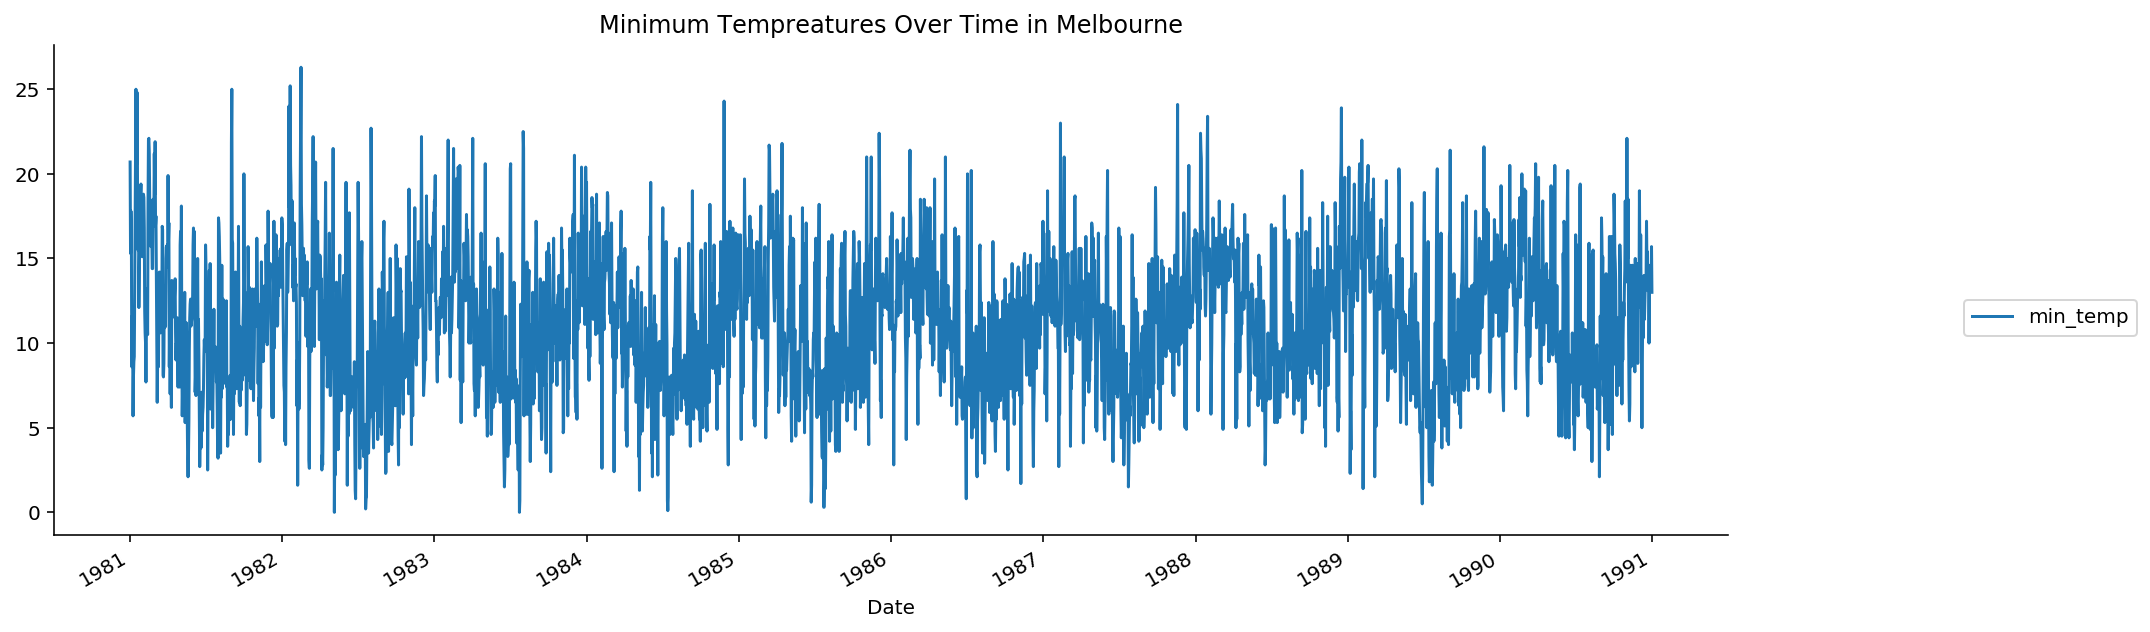

In [113]:
series.plot(figsize = (15,5))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Minimum Tempreatures Over Time in Melbourne")
sns.despine()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots. Below is an example of changing the style of the line to be black dots instead of a connected line ```(the style=’k.’ argument)```. We could change this example to use a dashed line by setting style to be ```’k--’```.

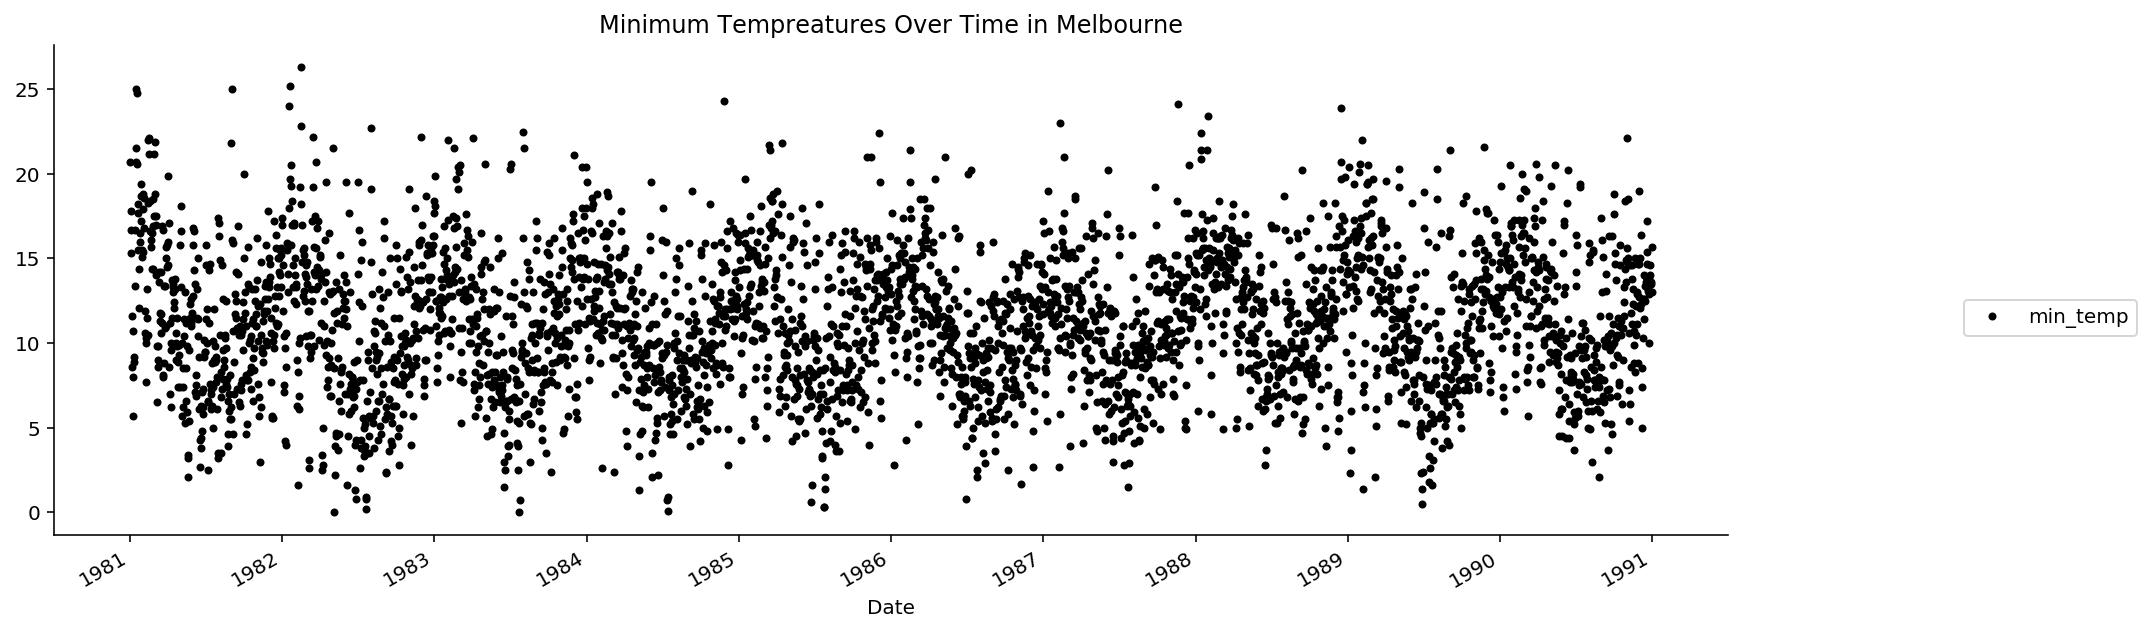

In [115]:
series.plot(figsize = (15,5), style='k.')
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Minimum Tempreatures Over Time in Melbourne")
sns.despine()

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct comparison. The example below shows how to do this. First the observations are grouped by year
```(series.groupby(Grouper(freq=’A’)```

In [116]:
series

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
1981-06-01    15.8
1981-07-01    15.8
1981-08-01    17.4
1981-09-01    21.8
1981-10-01    20.0
1981-11-01    16.2
1981-12-01    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
1981-01-22    12.1
1981-01-23    14.4
1981-01-24    16.0
1981-01-25    16.5
1981-01-26    18.7
1981-01-27    19.4
1981-01-28    17.2
1981-01-29    15.5
1981-01-30    15.1
              ... 
1990-02-12    13.2
1990-03-12    16.2
1990-04-12    17.3
1990-05-12    20.5
1990-06-12    20.2
1990-07-12    19.4
1990-08-12    15.5
1990-09-12    14.1
1990-10-12    11.0
1990-11-12    11.1
1990-12-12    14.0
1990-12-13    11.4
1990-12-14    12.5
1990-12-15    13.4
1990-12-16    13.6
1990-12-17    13.9
1990-12-18    17.2
1990-12-19    14.7
1990-12-20    15.4
1990-12-21    13.1
1990-12-22    13.2
1990-12

Read [this](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) to understand short form in ```freq``` option in ```Grouper```.

In [117]:
groups = series.groupby(pd.Grouper(freq='A'))

In [119]:
years = pd.DataFrame()

In [123]:
for name, group in groups:
    #print(name,"---->" ,group)
    years[name.year] = group.values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3719deb8>,
      dtype=object)

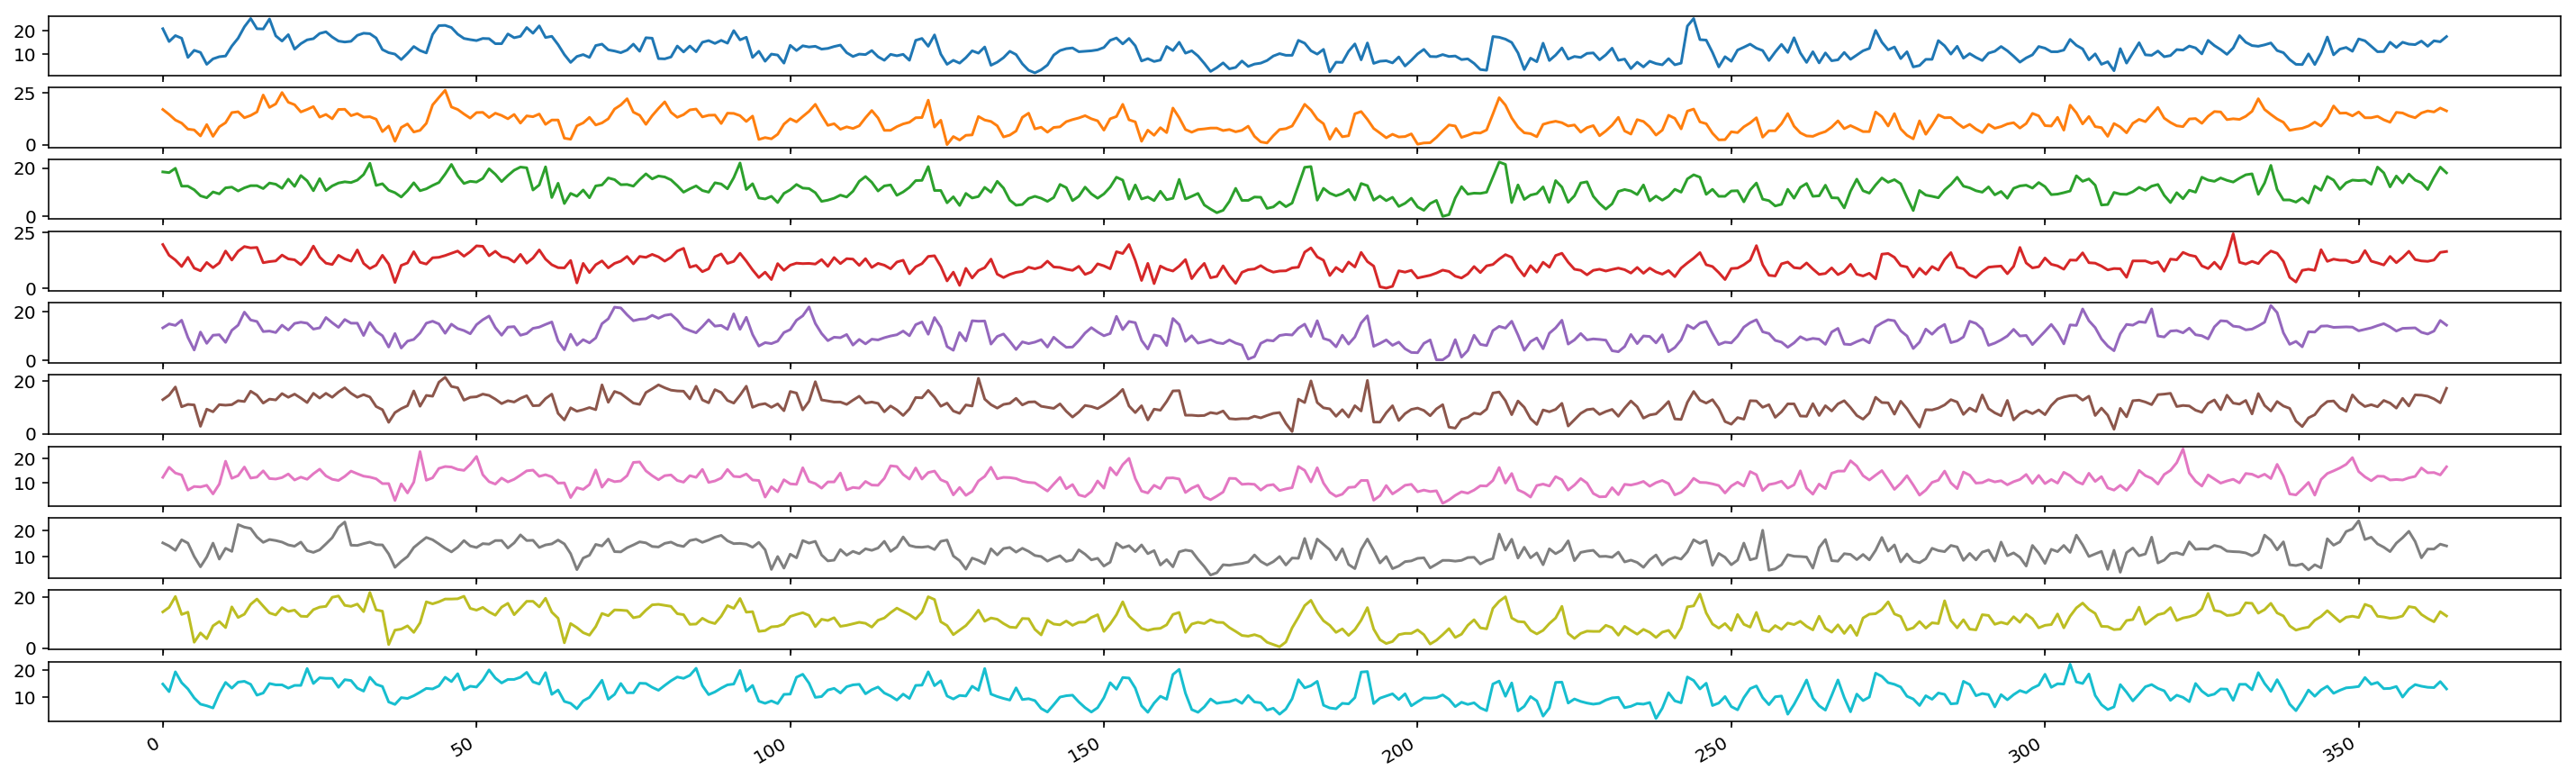

In [125]:
years.plot(subplots=True, legend=False, figsize=(25,8))

#### 2. Histograms and density plots

Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.
The example below creates a histogram plot of the observations in the Minimum Daily Temperatures dataset. A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

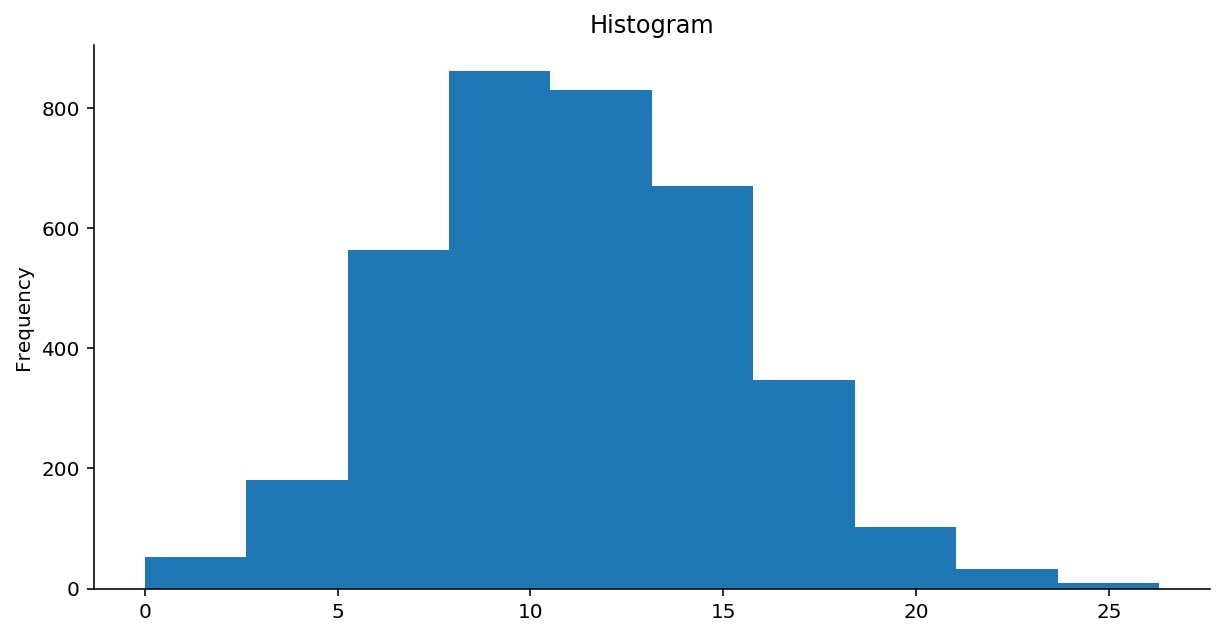

In [137]:
series.hist(figsize=(10,5))
plt.title("Histogram")
plt.ylabel("Frequency")
plt.grid()
sns.despine()

Running the example shows a distribution that looks strongly Gaussian. The plotting function automatically selects the size of the bins based on the spread of values in the data.


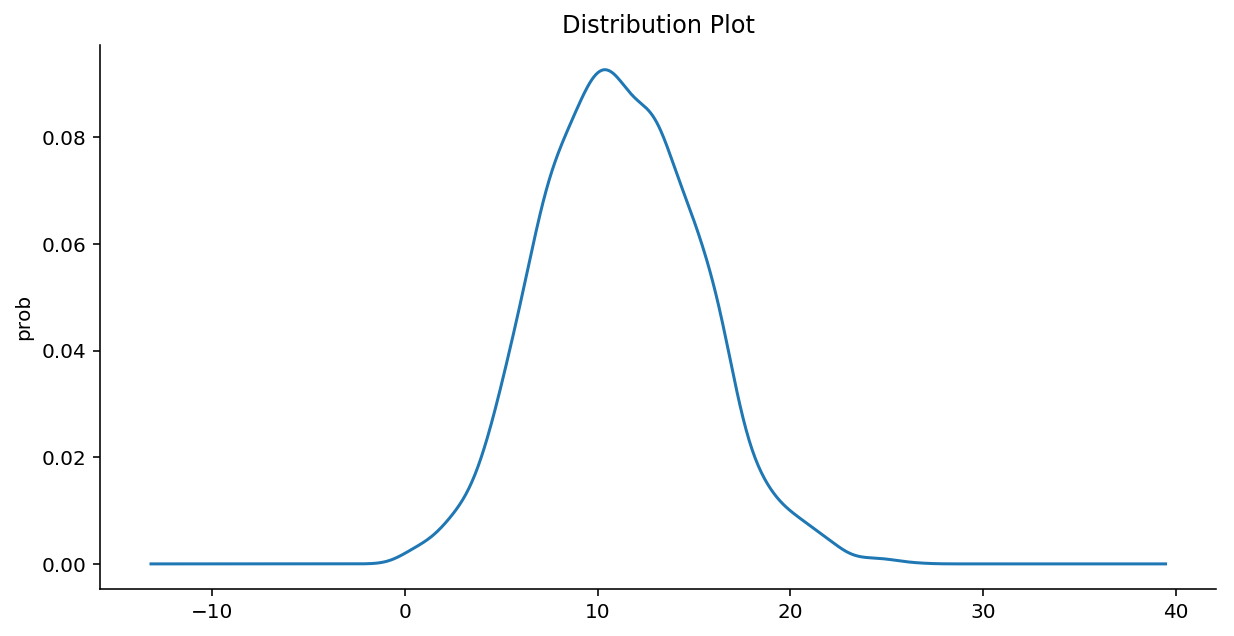

In [139]:
series.plot(kind='kde', figsize=(10,5))
plt.title("Distribution Plot")
plt.ylabel("prob")
#plt.grid()
sns.despine()

Running the example creates a plot that provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian. Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

#### 3. Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval. Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data

In [141]:
years.head()

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,15.3,14.6,18.1,14.7,14.9,14.6,16.5,14.1,16.1,12.0
2,17.8,11.9,19.9,12.6,14.3,17.7,14.1,12.4,20.4,19.3
3,16.7,10.4,12.5,9.7,16.4,10.2,13.3,16.5,13.3,15.3
4,8.6,7.5,12.5,13.8,9.4,11.1,7.0,15.2,14.2,13.0


In [142]:
years.shape

(365, 10)

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days. Below is an example of grouping the Minimum Daily Temperatures dataset by years, as was done above in the plot example. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison.

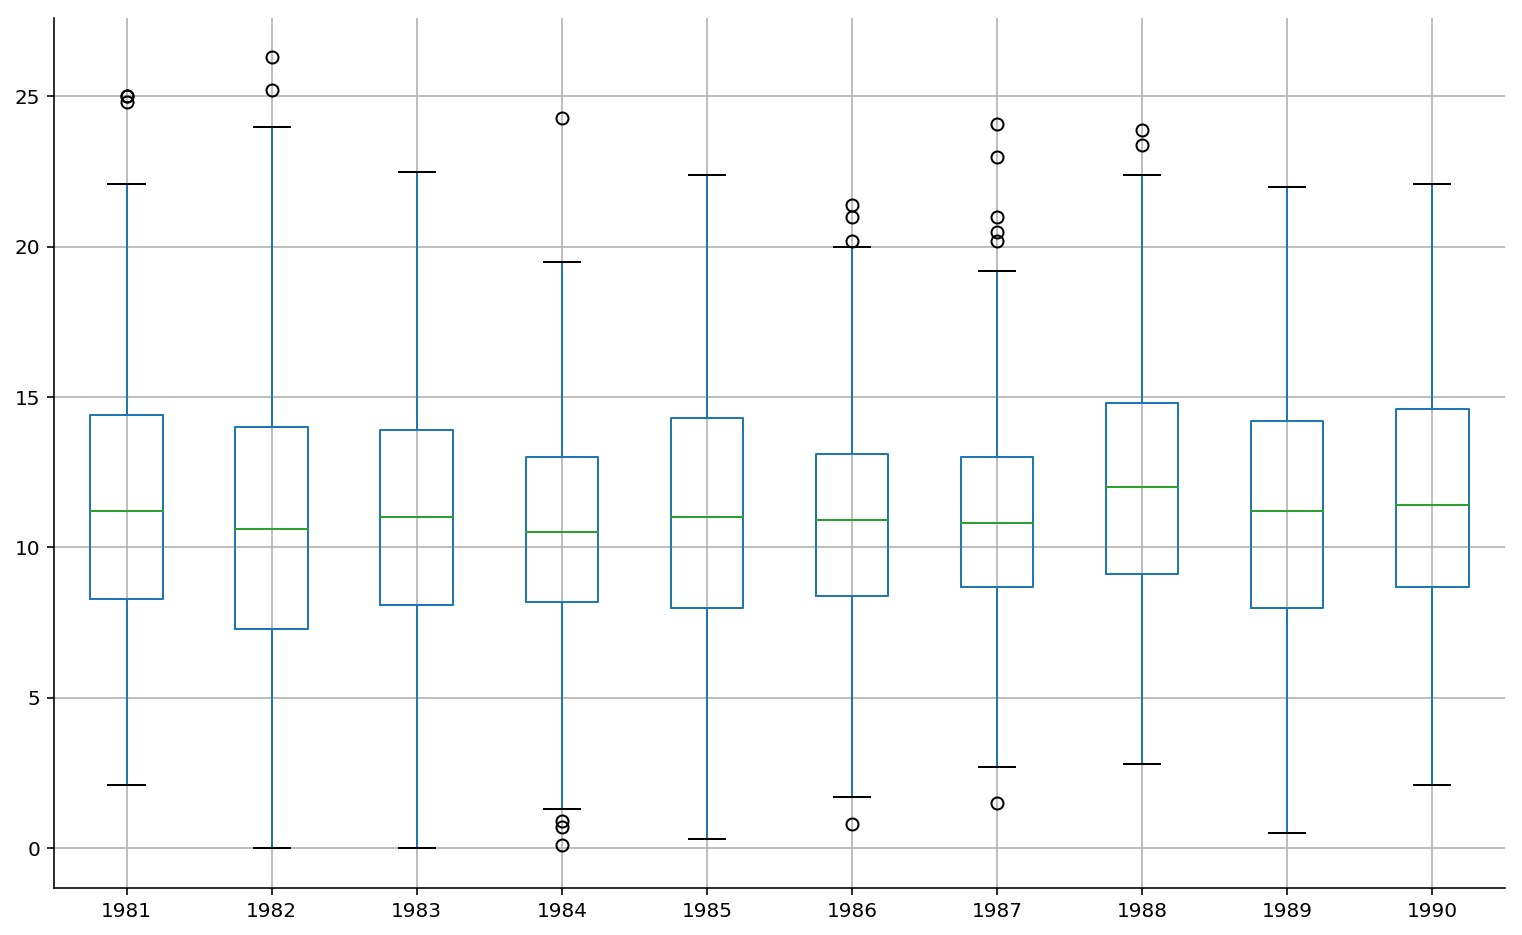

In [147]:
years.boxplot(figsize=(13,8))
sns.despine()

Comparing box and whisker plots by consistent intervals is a useful tool. Within an interval, it can help to spot outliers (dots above or below the whiskers). Across intervals, in this case years, we can look for multiple year trends, seasonality, and other structural information that could be modeled.

We may also be interested in the distribution of values across months within a year. The example below creates 12 box and whisker plots, one for each month of 1990, the last year in the dataset. In the example, first, only observations from 1990 are extracted. Then, the observations are grouped by month, and each month is added to a new DataFrame as a column. Finally, a box and whisker plot is created for each month-column in the newly constructed DataFrame.

In [152]:
one_year = series['1990']

In [154]:
groups = one_year.groupby(pd.Grouper(freq='M'))

In [155]:
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)

In [157]:
months = pd.DataFrame(months)

In [158]:
months.columns = range(1,13)

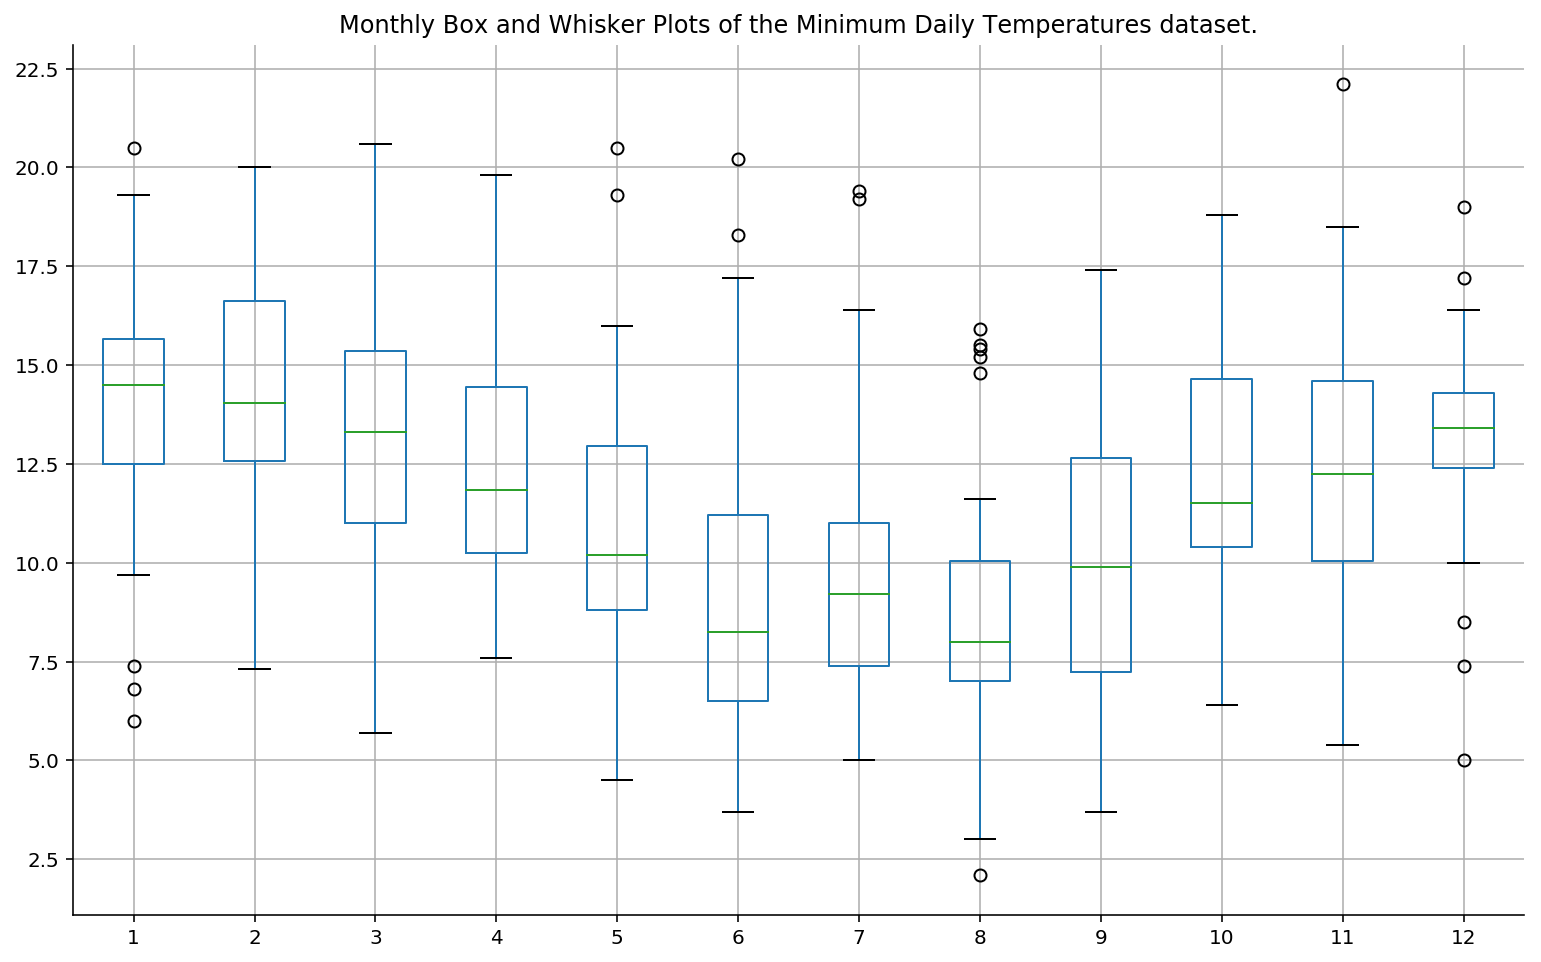

In [168]:
months.boxplot(figsize=(13,8))
plt.title('Monthly Box and Whisker Plots of the Minimum Daily Temperatures dataset.')
sns.despine()

##### 4. HeatMaps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map.


In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted. Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the Matplotlib library is used as no heatmap support is provided directly in Pandas. For convenience, the matrix

In [14]:
groups = series.groupby(pd.Grouper(freq='A')) 
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto') 
plt.title("Yearly Heat Map Plot of the Minimum Daily $amount dataset.")
sns.despine()

NameError: name 'series' is not defined

The plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between

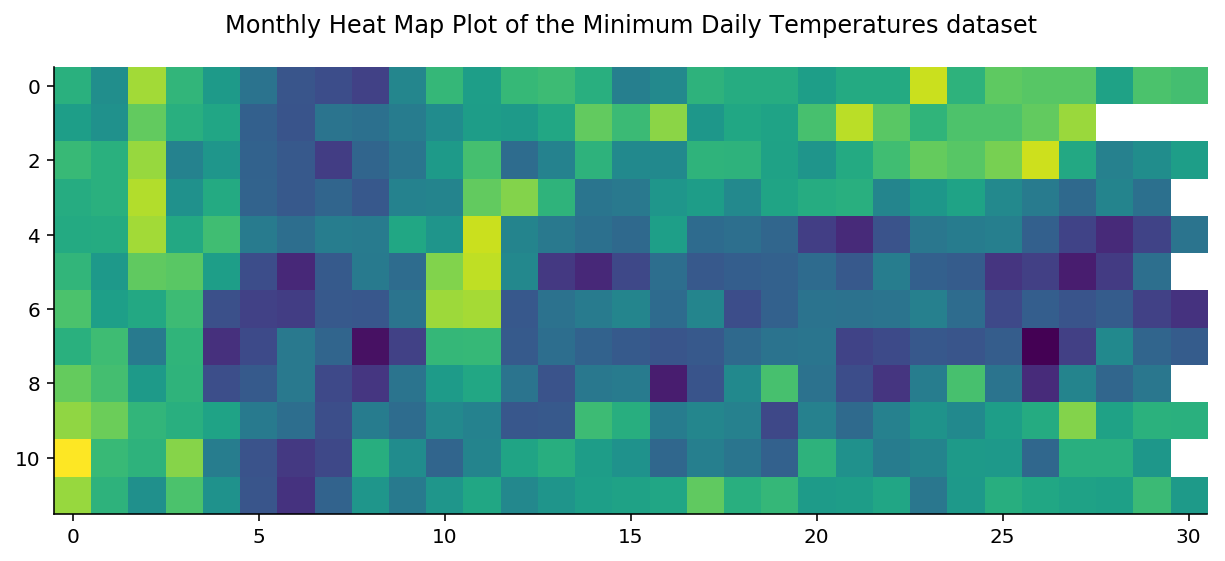

In [176]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1) 
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months.T, interpolation=None, aspect='auto') 
plt.title("Monthly Heat Map Plot of the Minimum Daily Temperatures dataset")
#plt.show()
sns.despine()

Running the example shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with
28 days in 1990.

##### Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called ```lags```, with the observation at the previous time step called ```lag1```, the observation at two time steps ago ```lag=2```, and so on. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. ```It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis```.

- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
- Either relationship is good as they can be modeled.


More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship. Below is an example of a lag plot for the Minimum Daily Temperatures dataset.

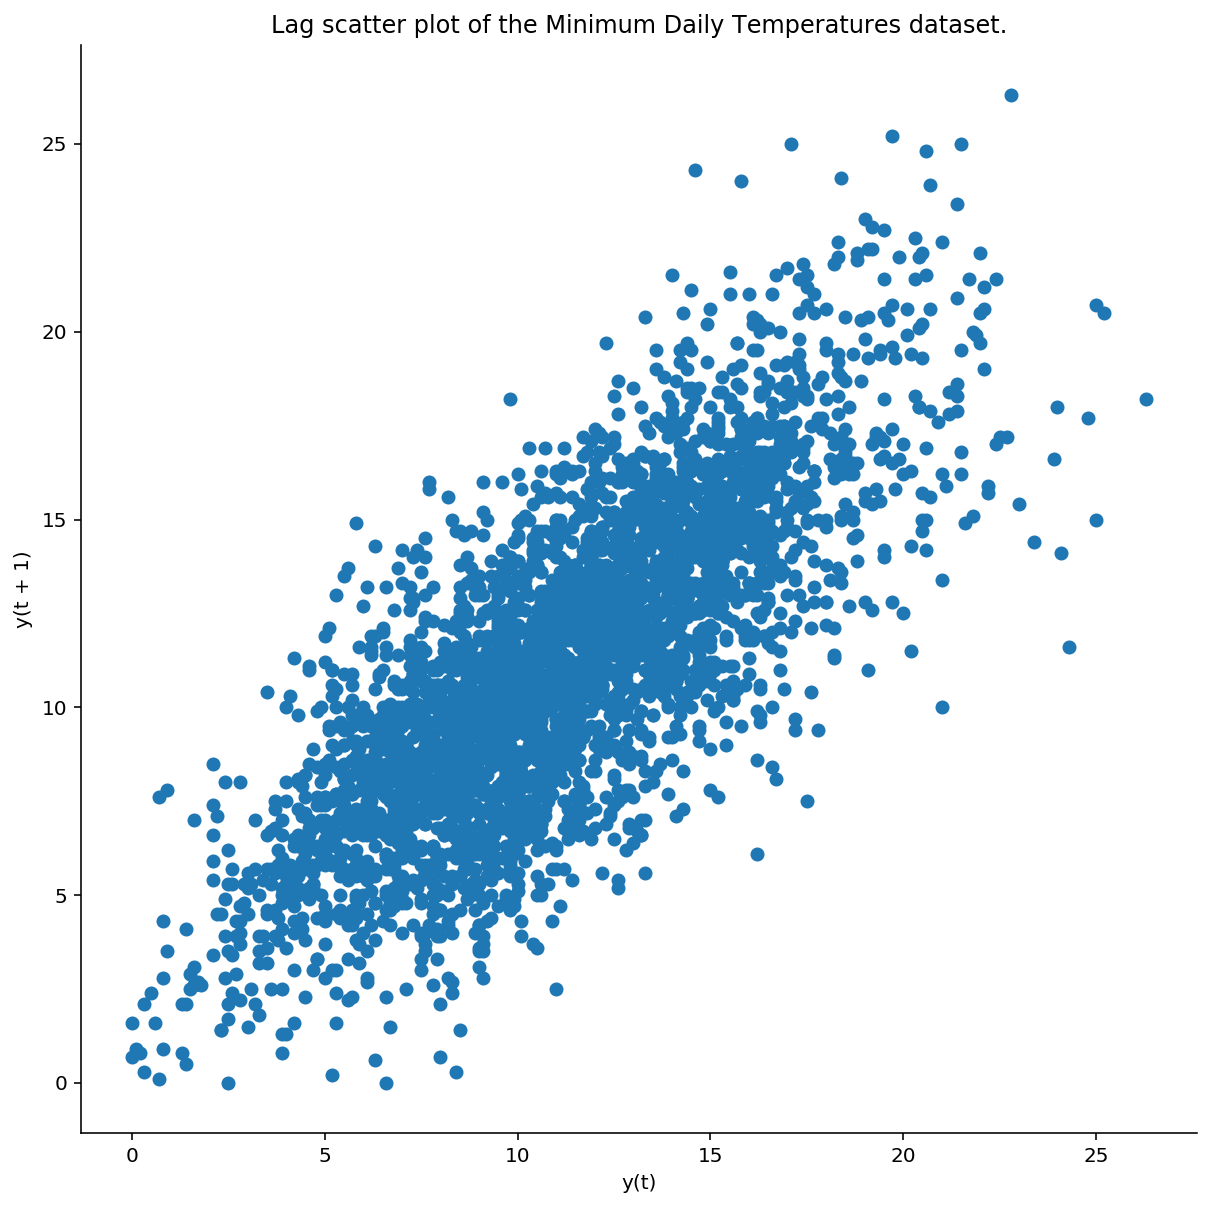

In [182]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pd.plotting.lag_plot(series, ax = ax)
ax.set_title("Lag scatter plot of the Minimum Daily Temperatures dataset.")
sns.despine()

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore. For example, we can create a scatter plot for the observation with each value in the previous seven days. Below is an example of this for the Minimum Daily Temperatures dataset. First, a new DataFrame is created with the lag values as new columns. The columns are named appropriately. Then a new subplot is created that plots each observation with a different lag value.

In [194]:
series

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
1981-06-01    15.8
1981-07-01    15.8
1981-08-01    17.4
1981-09-01    21.8
1981-10-01    20.0
1981-11-01    16.2
1981-12-01    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
1981-01-22    12.1
1981-01-23    14.4
1981-01-24    16.0
1981-01-25    16.5
1981-01-26    18.7
1981-01-27    19.4
1981-01-28    17.2
1981-01-29    15.5
1981-01-30    15.1
              ... 
1990-02-12    13.2
1990-03-12    16.2
1990-04-12    17.3
1990-05-12    20.5
1990-06-12    20.2
1990-07-12    19.4
1990-08-12    15.5
1990-09-12    14.1
1990-10-12    11.0
1990-11-12    11.1
1990-12-12    14.0
1990-12-13    11.4
1990-12-14    12.5
1990-12-15    13.4
1990-12-16    13.6
1990-12-17    13.9
1990-12-18    17.2
1990-12-19    14.7
1990-12-20    15.4
1990-12-21    13.1
1990-12-22    13.2
1990-12

In [195]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1) 
columns = ['t']
for i in range(1,(lags+1)):
    columns.append('t-'+str(i))
dataframe.columns = columns 

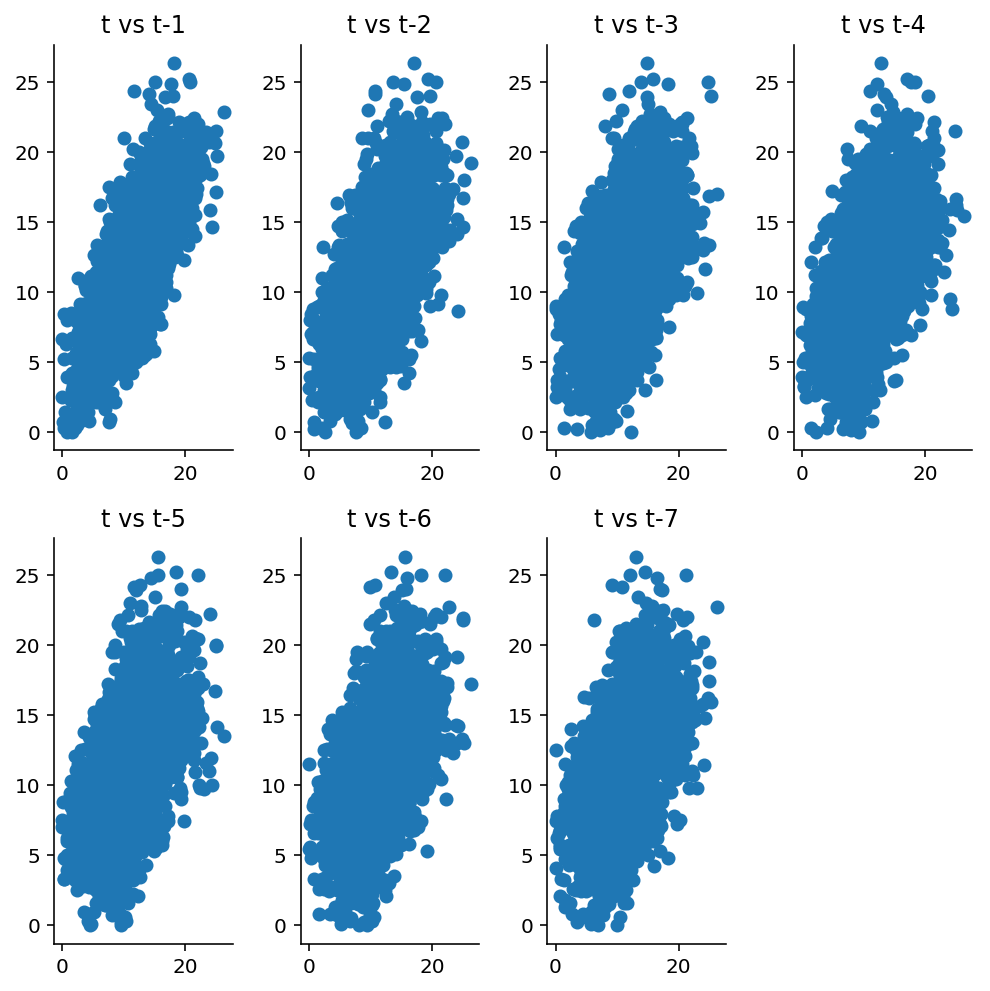

In [201]:
plt.figure(1, figsize=(7,7))
plt.title("Multiple Lag scatter plots of the Minimum Daily Temperatures dataset.")
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
#plt.title('Multiple Lag scatter plots of the Minimum Daily Temperatures dataset')
plt.tight_layout()
sns.despine()

##### Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.


Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation plot() function. The example below creates an autocorrelation plot for the Minimum Daily Temperatures dataset:

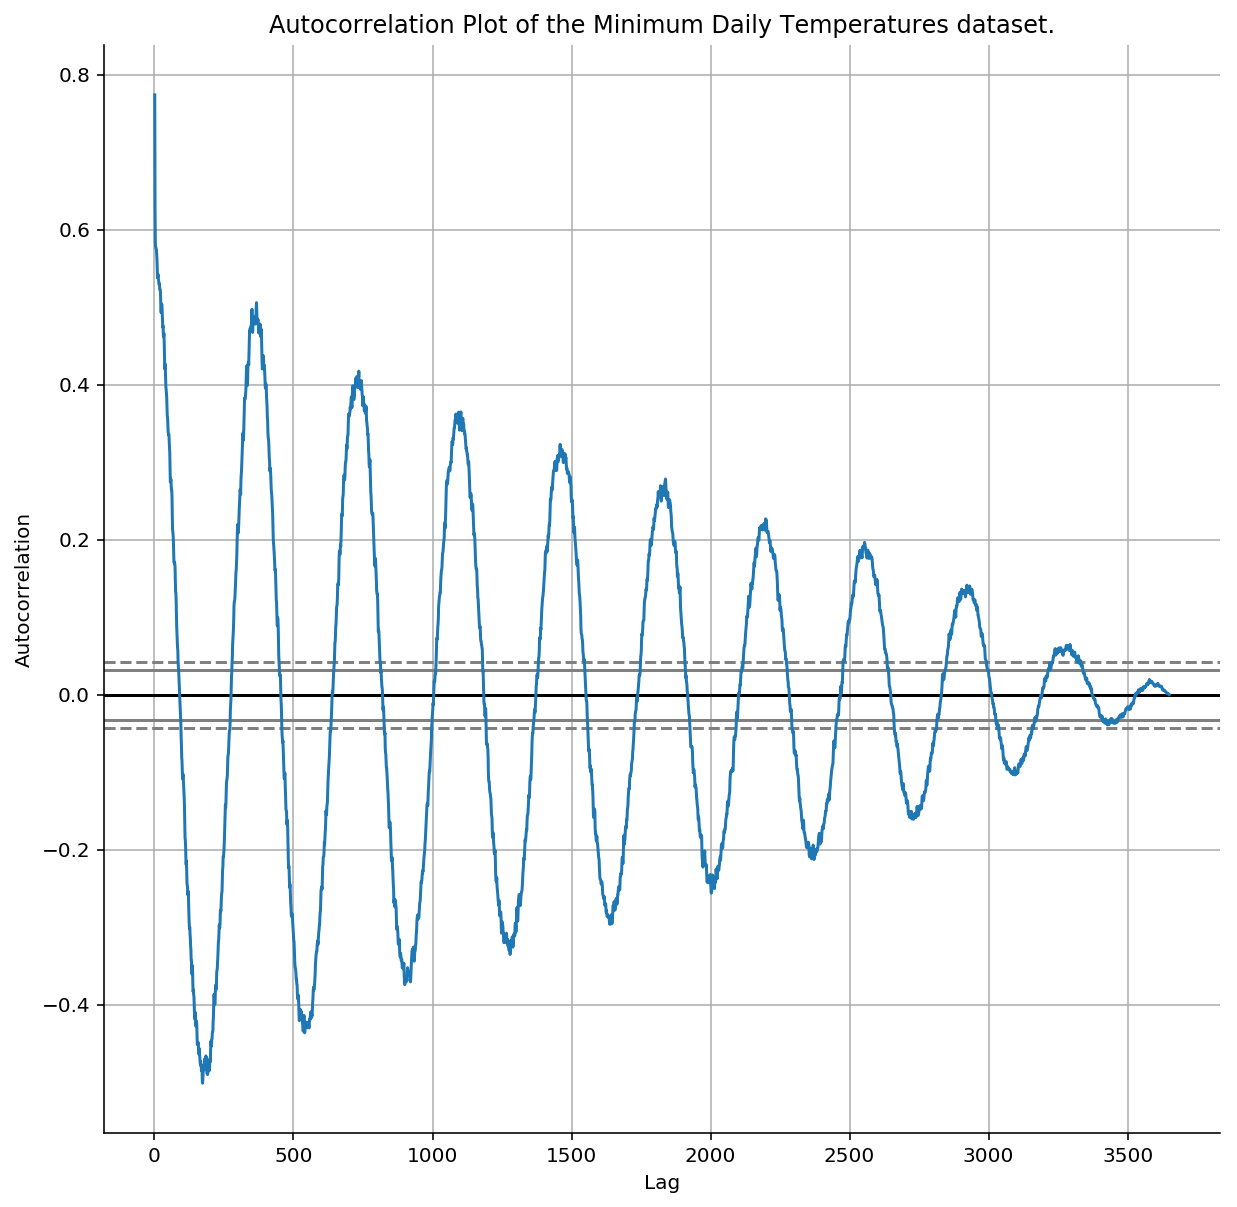

In [207]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pd.plotting.autocorrelation_plot(series, ax = ax)
ax.set_title("Autocorrelation Plot of the Minimum Daily Temperatures dataset.")
sns.despine()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

#### Resampling and Interpolation

You may have observations at the wrong frequency. Maybe they are too granular or not granular enough. The Pandas library in Python provides the capability to change the frequency of your time series data. In this tutorial, you will discover how to use Pandas in Python to both increase and decrease the sampling frequency of time series data. After completing this tutorial, you will know:


- About time series resampling, the two types of resampling, and the 2 main reasons why you need to use them.
- How to use Pandas to upsample time series data to a higher frequency and interpolate the new observations.
- How to use Pandas to downsample time series data to a lower frequency and summarize the higher frequency observations.


Let’s get started.

###### Resampling

Resampling involves changing the frequency of your time series observations. Two types of resampling are:
- **Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.
- **Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

In both cases, data must be invented. In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values. There are perhaps two main reasons why you may be interested in resampling your time series data:

- **Problem Framing**: Resampling may be required if your data is available at the same
frequency that you want to make predictions.
- **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.
There is a lot of overlap between these two cases. For example, you may have daily data and want to predict a monthly problem. You could use the daily data directly or you could downsample it to monthly data and develop your model. A feature engineering perspective may use observations and summaries of observations from both time scales and more in developing a model. Let’s make resampling more concrete by looking at a real dataset and some examples.


In this lesson, we will use the Shampoo Sales dataset as an example. This dataset describes the monthly number of sales of shampoo over a 3 year period. You can learn more about the dataset in Appendix A.1. Place the dataset in your current working directory with the filename shampoo-sales.csv.
The Shampoo Sales dataset only specifies year number and months (e.g. 1-01). A custom function is used to parse the dates and baseline the year number on an arbitrary year (1900) so that the date-times can be be interpreted correctly in the Pandas Series.

In [222]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [223]:
series = pd.read_csv('shampoo-sales.csv', header=0, 
                  index_col=0, parse_dates=True, squeeze=True, 
                  date_parser=parser)

In [224]:
upsampled = series.resample('D').mean() 
upsampled.head(32)

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64

Running this example prints the first 32 rows of the upsampled dataset, showing each day of January and the first day of February.


We can see that the ```resample()``` function has created the rows by putting ```NaN values``` in the new values. We can see we still have the sales volume on the first of January and February from the original data. Next, we can interpolate the missing values at this new frequency. The Series Pandas object provides an ```interpolate()``` function to interpolate missing values, and there is a nice selection of simple and more complex interpolation functions. You may have domain knowledge to help choose how values are to be interpolated. A good starting point is to use a linear interpolation. This draws a straight line between available data, in this case on the first of the month, and fills in values at the chosen frequency from this line.

In [225]:
interpolated = upsampled.interpolate(method='linear') 

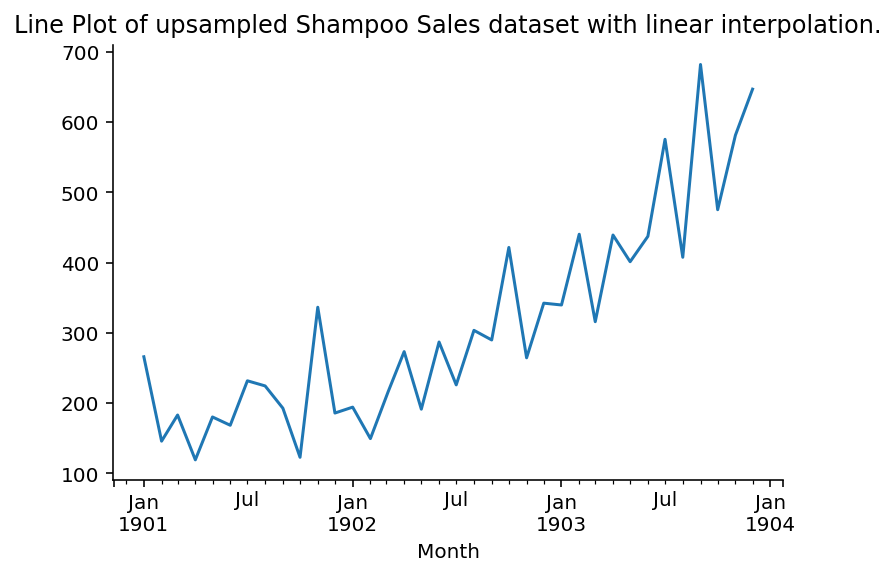

In [228]:
interpolated.head(32)
interpolated.plot()
plt.title("Line Plot of upsampled Shampoo Sales dataset with linear interpolation.")
sns.despine()

Another common interpolation method is to use a polynomial or a spline to connect the values. This creates more curves and can look more natural on many datasets. Using a spline interpolation requires you specify the order (number of terms in the polynomial); in this case, an order of 2 is just fine.

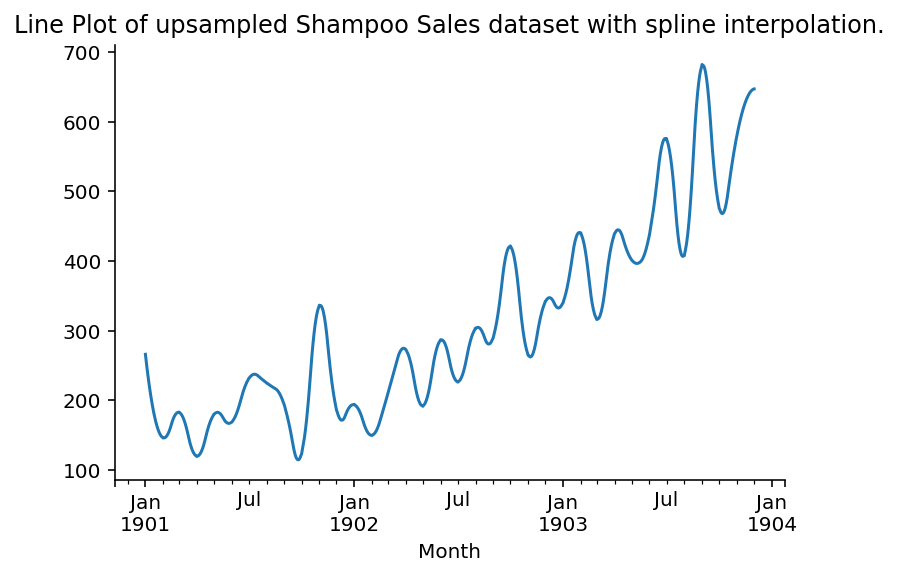

In [229]:
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2) 
interpolated.head(32)
interpolated.plot()
plt.title("Line Plot of upsampled Shampoo Sales dataset with spline interpolation.")
sns.despine()

Generally, interpolation is a useful tool when you have missing observations. Next, we will consider resampling in the other direction and decreasing the frequency of observations.

###### Downsampling


The sales data is monthly, but perhaps we would prefer the data to be quarterly. The ```year can be divided into 4 business quarters, 3 months a piece```. Instead of creating new rows between existing observations, the ```resample()``` function in Pandas will group all observations by the new frequency.


We could use an ```alias like 3M to create groups of 3 months```, but this might have trouble if our observations did not start in January, April, July, or October. Pandas does have a quarter-aware alias of Q that we can use for this purpose. We must now decide how to create a new quarterly value from each group of 3 records. A good starting point is to calculate the average monthly sales numbers for the quarter. For this, we can use the ```mean()``` function. Putting this all together, we get the following code example.

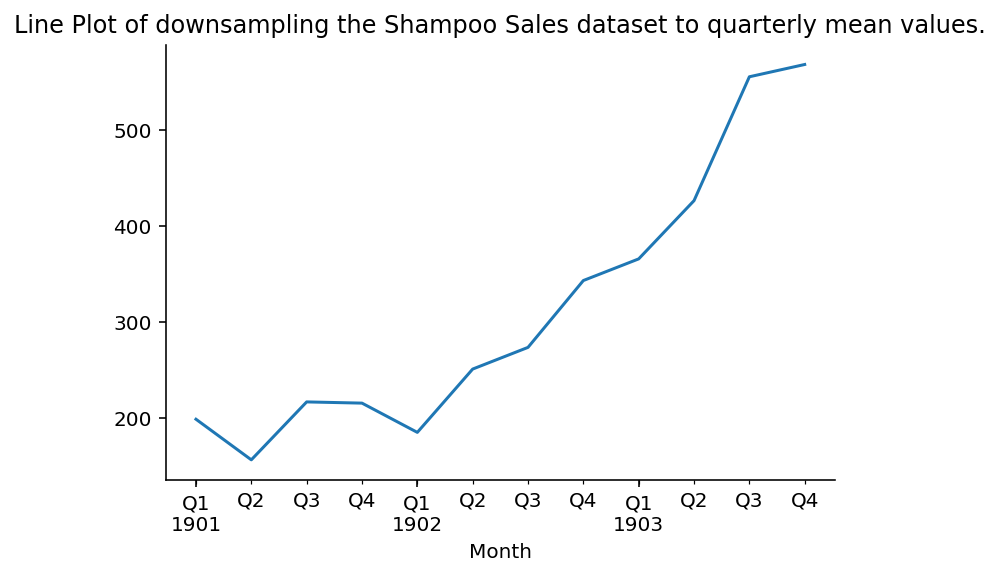

In [231]:
resample = series.resample('Q') 
quarterly_mean_sales = resample.mean() 
quarterly_mean_sales.head()
quarterly_mean_sales.plot()
plt.title('Line Plot of downsampling the Shampoo Sales dataset to quarterly mean values.')
sns.despine()

Text(0.5,1,'Line Plot of downsampling the Shampoo Sales dataset to yearly sum values.')

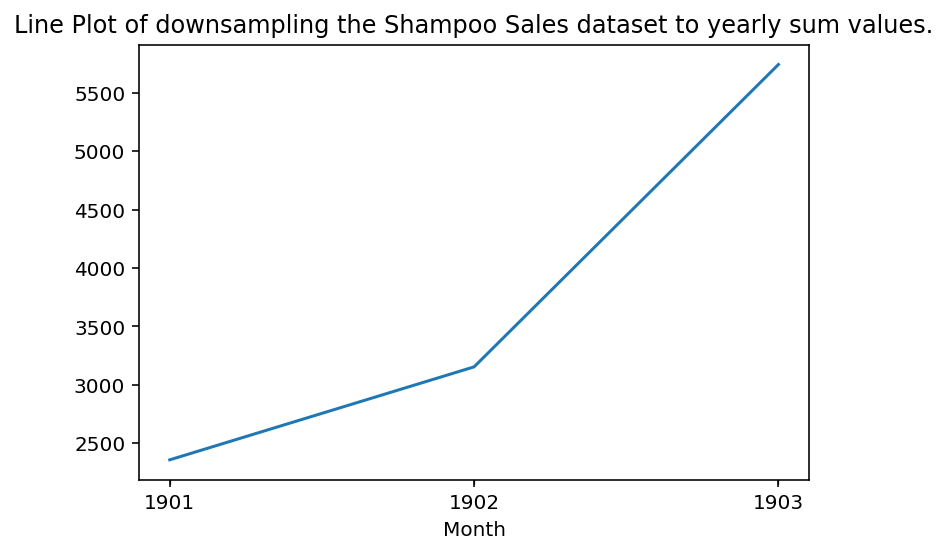

In [232]:
resample = series.resample('A')
yearly_mean_sales = resample.sum() 
yearly_mean_sales.head()
yearly_mean_sales.plot()
plt.title('Line Plot of downsampling the Shampoo Sales dataset to yearly sum values.')

#### Power Transforms

Data transforms are intended to remove noise and improve the signal in time series forecasting. It can be very difficult to select a good, or even best, transform for a given prediction problem. There are many transforms to choose from and each has a different mathematical intuition. In this tutorial, you will discover how to explore different power-based transforms for time series forecasting with Python. After completing this tutorial, you will know:
- How to identify when to use and how to explore a square root transform.
- How to identify when to use and explore a log transform and the expectations on raw
data.
- How to use the Box-Cox transform to perform square root, log, and automatically discover the best power transform for your dataset.
Let’s get started.

In [259]:
series = pd.read_csv('./code/chapter_08/airline-passengers.csv', header=0, 
                     index_col=0, parse_dates=True, squeeze=True)

Running the example creates two plots, the first showing the time series as a line plot and
the second showing the observations as a histogram.

(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <a list of 10 Patch objects>)

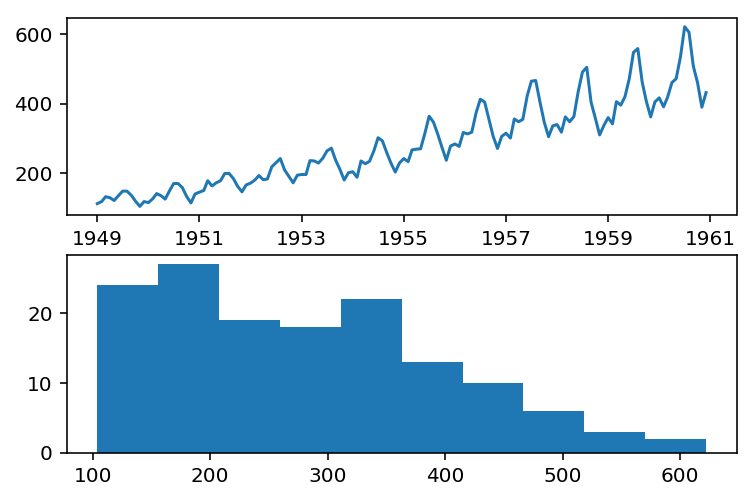

In [243]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)

The dataset is ```non-stationary, meaning that the mean and the variance of the observations change over time```. This makes it difficult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend and a seasonality component.
In addition, the amount of change, or the variance, is increasing with time. This is clear when you look at the size of the seasonal component and notice that from one cycle to the next, the amplitude (from bottom to top of the cycle) is increasing. In this tutorial, we will investigate transforms that we can use on time series datasets that exhibit this property

##### Square-Root Transform

A time series that has a quadratic growth trend can be made linear by taking the square root. Let’s demonstrate this with a quick contrived example. Consider a series of the numbers 1 to 99 squared. The line plot of this series will show a quadratic growth trend and a histogram of the values will show an exponential distribution with a long trail. The snippet of code below creates and graphs this series.

(array([31., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([1.000e+00, 9.810e+02, 1.961e+03, 2.941e+03, 3.921e+03, 4.901e+03,
        5.881e+03, 6.861e+03, 7.841e+03, 8.821e+03, 9.801e+03]),
 <a list of 10 Patch objects>)

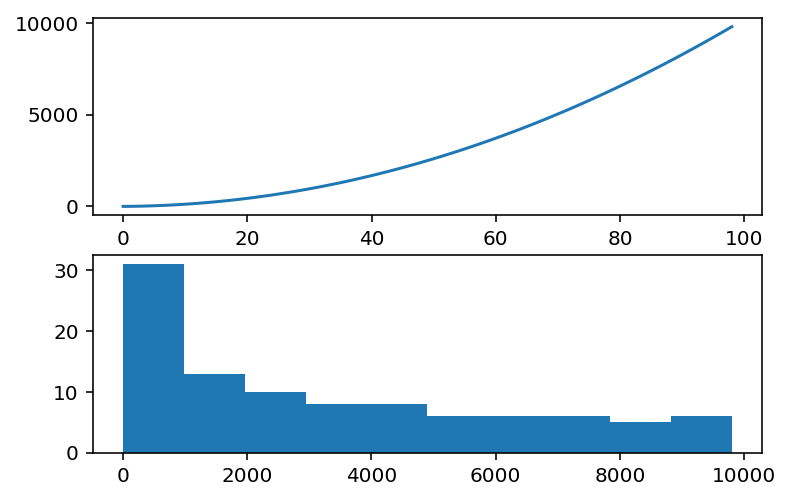

In [244]:
series = [i**2 for i in range(1,100)]
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)

If you see a structure like this in your own time series, you may have a quadratic growth trend. This can be removed or made linear by taking the inverse operation of the squaring procedure, which is the square root. Because the example is perfectly quadratic, we would expect the line plot of the transformed data to show a straight line. Because the source of the squared series is linear, we would expect the histogram to show a uniform distribution. The example below performs a sqrt() transform on the time series and plots the result.

(array([10., 10., 10., 10.,  9., 10., 10., 10., 10., 10.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

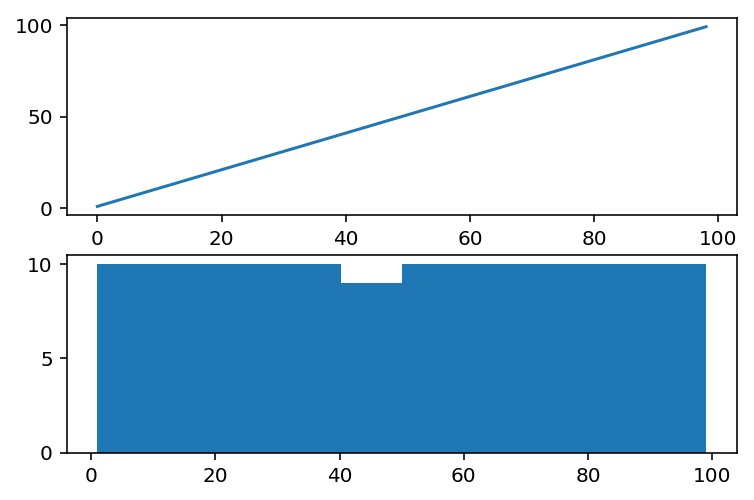

In [247]:
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = np.sqrt(series)
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(transform)
# histogram
plt.subplot(212)
plt.hist(transform)

It is possible that the Airline Passengers dataset shows a quadratic growth. If this is the case, then we could expect a square root transform to reduce the growth trend to be linear and change the distribution of observations to be perhaps nearly Gaussian. The example below
performs a square root of the dataset and plots the results.

(array([16., 17., 20., 17., 17., 23., 16., 10.,  5.,  3.]),
 array([10.19803903, 11.67222791, 13.14641679, 14.62060567, 16.09479455,
        17.56898343, 19.04317231, 20.51736119, 21.99155007, 23.46573895,
        24.93992783]),
 <a list of 10 Patch objects>)

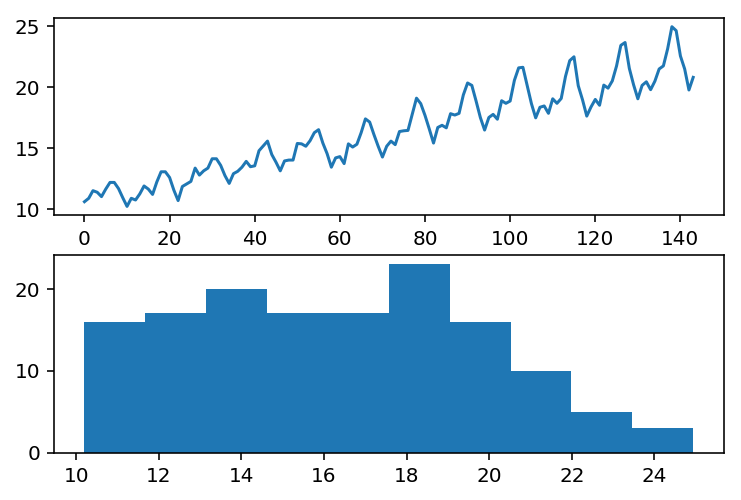

In [255]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers'] 
dataframe['passengers'] = np.sqrt(dataframe['passengers'])
plt.figure(1)
# line plot
plt.subplot(211) 
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])

We can see that the trend was reduced, but was not removed. The line plot still shows an increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the distribution, suggesting an exponential or long-tail distribution.

##### Log Transform

A class of more extreme trends are exponential, often graphed as a hockey stick. Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform. As with the square and square root case above, we can demonstrate this with a quick example. The code below creates an exponential distribution by raising the numbers from 1 to 99 to the value e, which is the base of the natural logarithms or Euler’s number (2.718...)1.

(array([96.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.71828183e+00, 9.88903032e+41, 1.97780606e+42, 2.96670910e+42,
        3.95561213e+42, 4.94451516e+42, 5.93341819e+42, 6.92232122e+42,
        7.91122426e+42, 8.90012729e+42, 9.88903032e+42]),
 <a list of 10 Patch objects>)

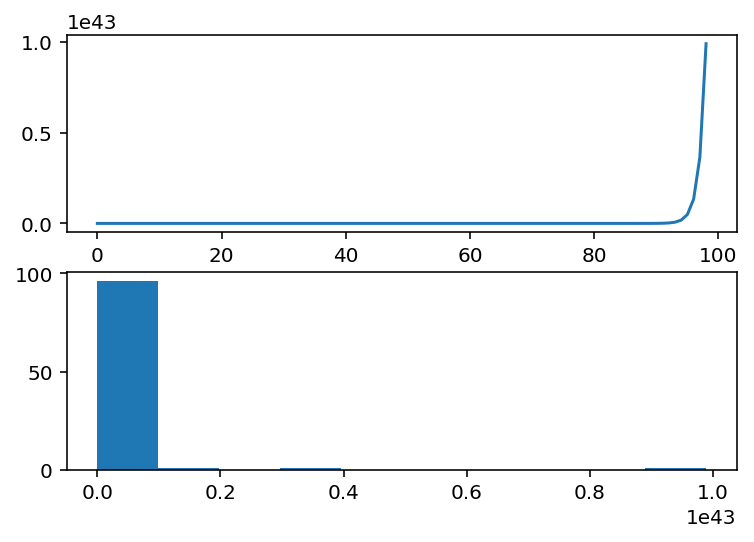

In [256]:
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)

Running the example creates a line plot of the series and a histogram of the distribution of observations. We see an extreme increase on the line graph and an equally extreme long tail distribution on the histogram.


Again, we can transform this series back to linear by taking the natural logarithm of the values. This would make the series linear and the distribution uniform. The example below demonstrates this for completeness.

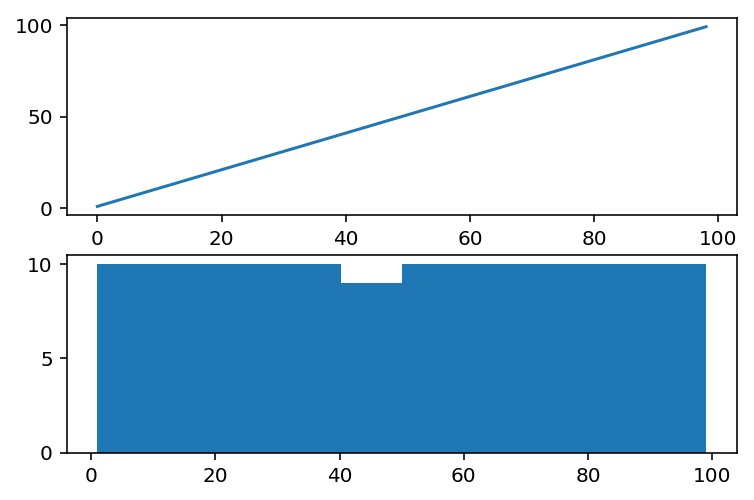

In [257]:
# log transform a contrived exponential time series
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

Log transforms are popular with time series data as they are effective at removing exponential variance. It is important to note that this operation assumes values are positive and non-zero. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement. For example:

```transform = log(constant + x)```

Where log is the natural logarithm, transform is the transformed series, constant is a fixed value that lifts all observations above zero, and x is the time series.

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <a list of 10 Patch objects>)

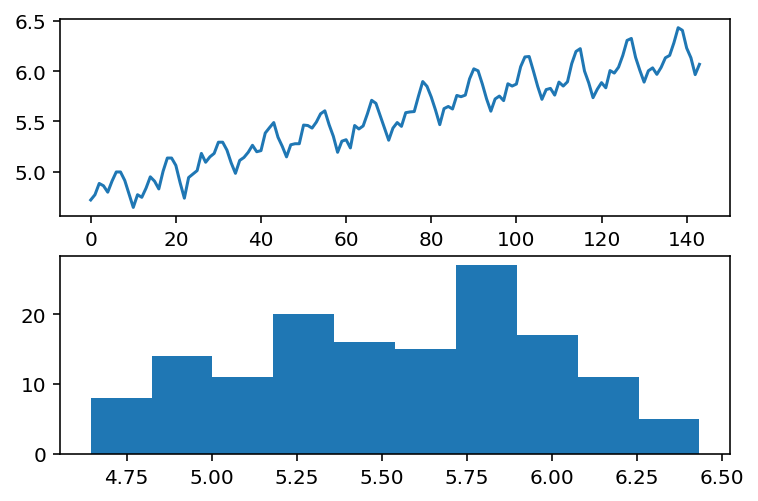

In [260]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers'] 
dataframe['passengers'] = np.log(dataframe['passengers'])
plt.figure(1)
# line plot
plt.subplot(211) 
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])

##### Box-Cox Plot

The square root transform and log transform belong to a class of transforms called power transforms. The Box-Cox transform2 is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.


More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it. The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function3 takes an argument, called lambda, that controls the type of transform to perform.


Below are some common values for lambda:

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform. 􏰀 lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [273]:
series = pd.read_csv('./code/chapter_08/airline-passengers.csv', header=0, index_col=0, 
                  parse_dates=True, squeeze=True)

In [264]:
import scipy

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <a list of 10 Patch objects>)

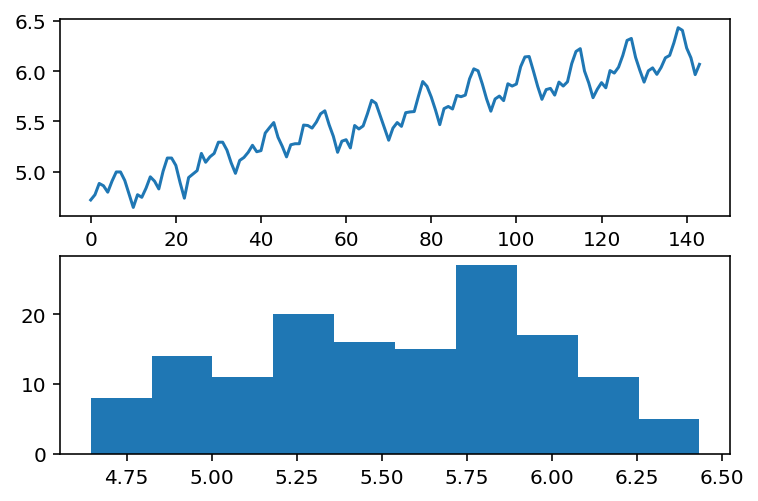

In [266]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = scipy.stats.boxcox(dataframe['passengers'], lmbda=0.0) 
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])

Lambda: 0.14802256545004658


(array([10., 14., 16., 14., 20., 21., 18., 16., 10.,  5.]),
 array([ 6.67929963,  7.08651458,  7.49372953,  7.90094447,  8.30815942,
         8.71537437,  9.12258931,  9.52980426,  9.93701921, 10.34423415,
        10.7514491 ]),
 <a list of 10 Patch objects>)

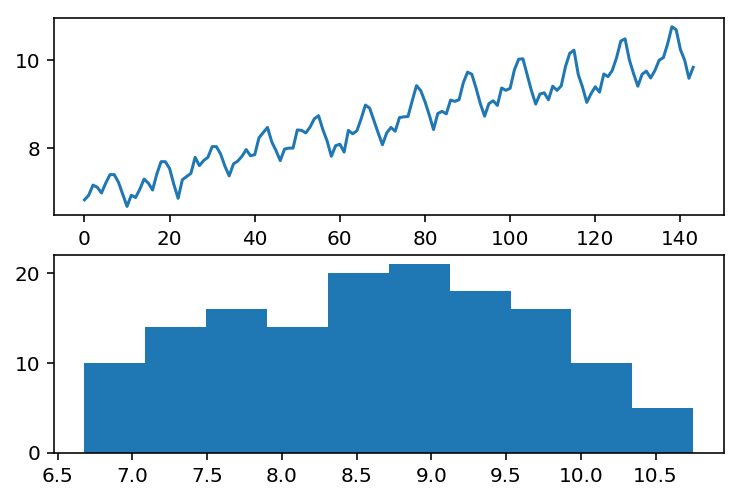

In [277]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] #= scipy.stats.boxcox(dataframe['passengers'], lmbda=0.0) 
dataframe['passengers'], lam = scipy.stats.boxcox(dataframe['passengers'])
print(f'Lambda: {lam}')
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])


Running the example discovers the lambda value of 0.148023. We can see that this is very close to a lambda value of 0.0, resulting in a log transform and stronger (less than) than 0.5 for the square root transform.

### Chapter 9: Moving average

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions. 

**Moving Average Smoothing**

*Smoothing* is a technique applied to time series to remove the fine-grained variation between
time steps. The hope of smoothing is to remove noise and better expose the signal of the
underlying causal processes. Moving averages are a simple and common type of smoothing
used in time series analysis and time series forecasting. Calculating a moving average involves
creating a new series where the values are comprised of the average of raw observations in the
original time series.


A moving average requires that you specify a window size called the *window width*. This
defines the number of raw observations used to calculate the moving average value. The moving
part in the moving average refers to the fact that the window defined by the window width is
slid along the time series to calculate the average values in the new series. There are two main
types of moving average that are used: **Centered and Trailing Moving Average.**

**Centered Moving Average**

The value at time ```(t)``` is calculated as the average of raw observations at, before, and after time
```(t)```. For example, a center moving average with a window of 3 would be calculated as:
    
\begin{align}
center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))
\end{align}

This method requires knowledge of future values, and as such is used on time series analysis
to better understand the dataset. A center moving average can be used as a general method to
remove trend and seasonal components from a time series, a method that we often cannot use
when forecasting.

**Trailing Moving Average**

The value at time ```(t)``` is calculated as the average of the raw observations at and before the time ```(t)```. For example, a trailing moving average with a window of 3 would be calculated as:

\begin{align}
trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))
\end{align}


Trailing moving average only uses historical observations and is used on time series forecasting.
It is the type of moving average that we will focus on in this tutorial.

###### Data Expectations 

Calculating a moving average of a time series makes some assumptions about your data. **It is
assumed that both trend and seasonal components have been removed from your time series**.
This means that your time series is stationary, or does not show obvious trends (long-term
increasing or decreasing movement) or seasonality (consistent periodic structure).
There are many methods to remove trends and seasonality from a time series dataset when
forecasting. Two good methods for each are to use the differencing method and to model the
behavior and explicitly subtract it from the series.


Moving average values can be used in a number of ways when using machine learning
algorithms on time series problems. In this tutorial, we will look at how we can calculate trailing
moving average values for use as data preparation, feature engineering, and for directly making
predictions. Before we dive into these examples, let's look at the Daily Female Births dataset
that we will use in each example.

**Moving Average as Data Prepration**

Moving average can be used as a data preparation technique to create a smoothed version of
the original dataset. Smoothing is useful as a data preparation technique as it can reduce the
random variation in the observations and better expose the structure of the underlying causal
processes. The ```rolling()``` function on the Series Pandas object will automatically group observations
into a window. You can specify the window size, and by default a trailing window is created.
Once the window is created, we can take the mean value, and this is our transformed dataset.
New observations in the future can be just as easily transformed by keeping the raw values
for the last few observations and updating a new average value. To make this concrete, with
a window size of 3, the transformed value at time (t) is calculated as the mean value for the
previous 3 observations (t-2, t-1, t), as follows:

## Temporal Structure

#### Introduction to White Noise

White noise is an important concept in time series forecasting. If a time series is white noise, it
is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not
white noise, it suggests improvements could be made to the predictive model.

*What is White Noise*

A time series may be white noise. A time series is white noise if the variables are independent
and identically distributed with a mean of zero. This means that all variables have the same
variance *(sigma2)* and each value has a zero correlation with all other values in the series. If
the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian
white noise.

White noise is an important concept in time series analysis and forecasting. It is important for
two main reasons:
- Predictability: If your time series is white noise, then, by denition, it is random. You
cannot reasonably model it and make predictions.
- Model Diagnostics: The series of errors from a time series forecast model should ideally
be white noise.

Model Diagnostics is an important area of time series forecasting. Time series data are
expected to contain some white noise component on top of the signal generated by the underlying
process. For example:
    
    
y(t) = signal(t) + noise(t) (10.1)


Once predictions have been made by a time series forecast model, they can be collected and
analyzed. The series of forecast errors should ideally be white noise. When forecast errors are
white noise, it means that all of the signal information in the time series has been harnessed by
the model in order to make predictions. All that is left is the random 
fluctuations that cannot
be modeled. A sign that model predictions are not white noise is an indication that further
improvements to the forecast model may be possible.

**Is your timeseries white noise ?? **

Your time series is not white noise if any of the following conditions are true:
- Does your series have a non-zero mean?
- Does the variance change over time?
- Do values correlate with lag values?

Some tools that you can use to check if your time series is white noise are:
- Create a line plot. Check for gross features like a changing mean, variance, or obvious
relationship between lagged variables.
- Calculate summary statistics. Check the mean and variance of the whole series against
the mean and variance of meaningful contiguous blocks of values in the series (e.g. days,
months, or years).
- Create an autocorrelation plot. Check for gross correlation between lagged variables.

we will create a Gaussian white noise series in Python and perform some checks.
It is helpful to create and review a white noise time series in practice. It will provide the frame
of reference and example plots and statistical tests to use and compare on your own time series
projects to check if they are white noise. Firstly, we can create a list of 1,000 random Gaussian
variables using the gauss() function from the random module1. We will draw variables from a
Gaussian distribution with a mean (mu) of 0.0 and a standard deviation (sigma) of 1.0. Once
created, we can wrap the list in a Pandas Series for convenience.

In [5]:
import random

In [6]:
series = [random.gauss(0.0,1.0) for i in range(1000)]

In [7]:
series = pd.Series(series)

In [8]:
series.describe()

count    1000.000000
mean       -0.033760
std         0.966034
min        -3.387000
25%        -0.637218
50%         0.010549
75%         0.611987
max         3.201700
dtype: float64

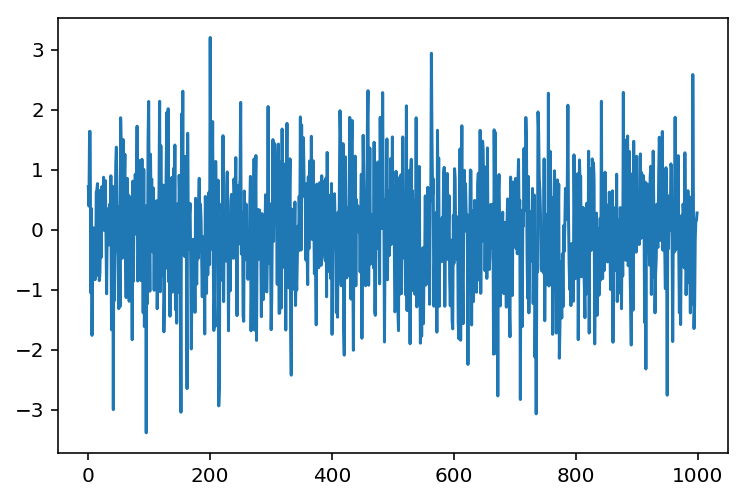

In [9]:
series.plot()

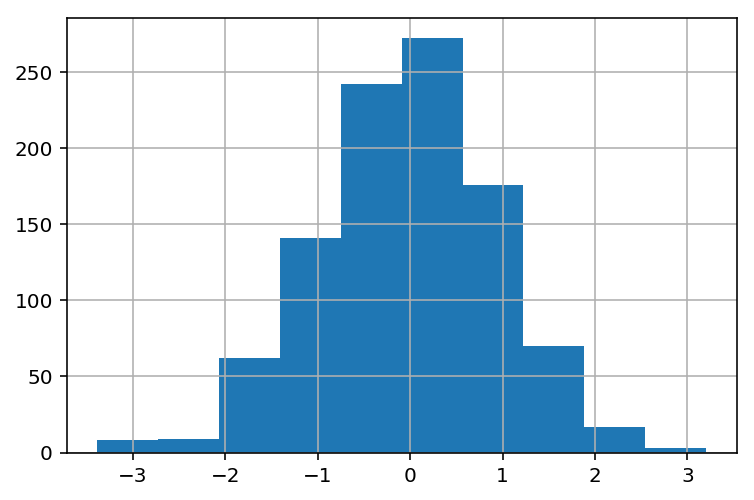

In [10]:
series.hist()

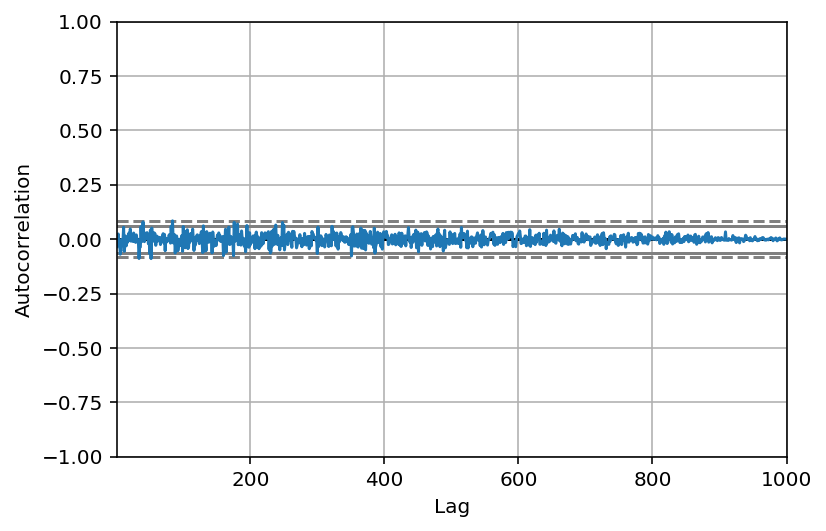

In [11]:
pd.plotting.autocorrelation_plot(series)

> The correlogram does not show any obvious autocorrelation pattern. There are some spikes
above the 95% and 99% confidence level, but these are a statistical 
fluke.

#### Introduction to Random Walk

How do you know your time series problem is predictable? This is a dicult question with
time series forecasting. There is a tool called a random walk that can help you understand the
predictability of your time series forecast problem.

*Random Series*

The Python standard library contains the ```random module``` that provides access to a suite of
functions for generating random numbers. The ```randrange()``` function can be used to generate
a random integer between 0 and an upper limit. We can use the ```randrange()``` function to
generate a list of 1,000 random integers between 0 and 10.

In [15]:
series = [random.randrange(10) for i in range(1000)]

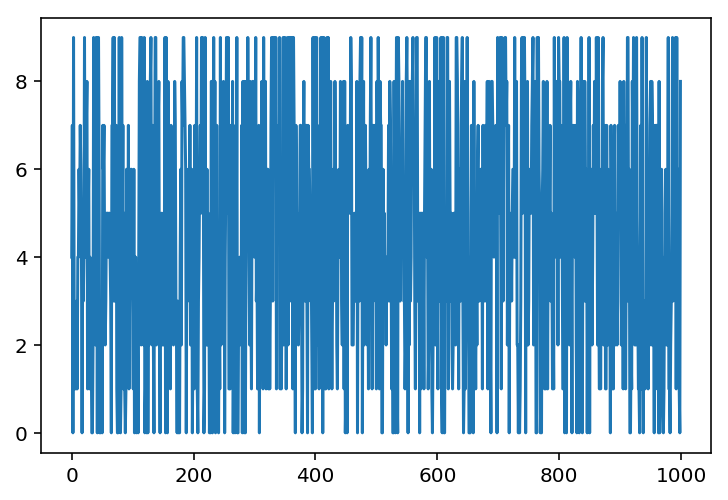

In [16]:
plt.plot(series)

Running the example plots the sequence of random numbers. It's a real mess. It looks
nothing like a time series. This is not a random walk. It is just a sequence of random numbers also called white noise
(see Chapter 10). A common mistake that beginners make is to think that a random walk is a
list of random numbers, and this is not the case at all.

**Random Walk**

A random walk is different from a list of random numbers because the next value in the sequence
is a modification of the previous value in the sequence. The process used to generate the series
forces dependence from one-time step to the next. This dependence provides some consistency
from step-to-step rather than the large jumps that a series of independent, random numbers
provides. It is this dependency that gives the process its name as a random walk or a drunkard's
walk. A simple model of a random walk is as follows:

1. Start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step.
3. Repeat step 2 for as long as you like.

More succinctly, we can describe this process as:


y(t) = B0 + B1 x X(t - 1) + e(t) 


Where y(t) is the next value in the series. B0 is a coecient that if set to a value other
than zero adds a constant drift to the random walk. B1 is a coecient to weight the previous
time step and is set to 1.0. X(t-1) is the observation at the previous time step. e(t) is the
white noise or random 
uctuation at that time.

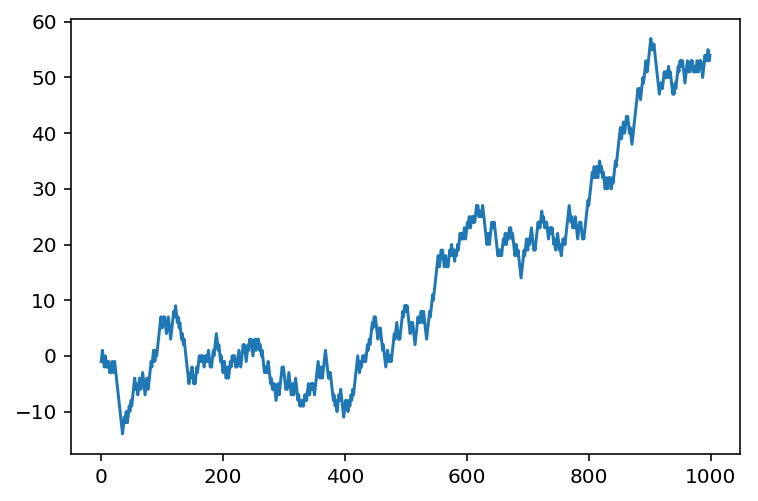

In [22]:
random.seed(1)
random_walk = list() 
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1,1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
plt.plot(random_walk)

Running the example creates a line plot of the random walk. We can see that it looks very
different from our above sequence of random numbers. In fact, the shape and movement looks
like a realistic time series for the price of a security on the stock market.

```We can calculate the correlation between each observation and the observations at previous time
steps.``` A plot of these correlations is called an autocorrelation plot or a correlogram3. Given the
way that the random walk is constructed, we would expect a strong autocorrelation with the
previous observation and a linear fall off from there with previous lag values. We can use the
```autocorrelation plot()``` function in Pandas to plot the correlogram for the random walk.

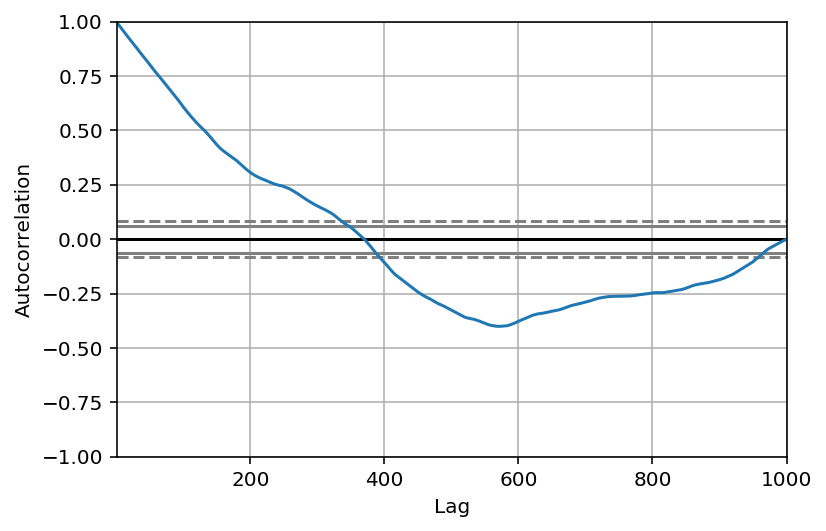

In [23]:
pd.plotting.autocorrelation_plot(random_walk)

Running the example, we generally see the expected trend, in this case across the first few hundred lag observations.

**Random Walk and Stationarity**

A stationary time series is one where the values are not a function of time. Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time. The current observation is a random step from the previous observation. Therefore we can expect a random walk to be non-stationary. ```In fact, all random walk processes are non-stationary```. ```Note that not all non-stationary time series are random walks```. Additionally, a non-stationary time series does not have a consistent mean and/or variance over time. A review of the random walk line plot might suggest this to be the case. We can confirm this using a statistical significance test, specifically the ```Augmented Dickey-Fuller test```.

We can perform this test using the ```adfuller() function in the Statsmodels library```.

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
result = adfuller(random_walk)

In [28]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	5%: -2.864
	1%: -3.437
	10%: -2.568


The null hypothesis of the test is that the time series is non-stationary. Running the example,
we can see that the test statistic value was 0.341605. This is larger than all of the critical values
at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does
appear to be non-stationary with a low likelihood of the result being a statistical 
uke.

We can make the random walk stationary by taking the first difference. That is replacing
each observation as the difference between it and the previous value. Given the way that this
random walk was constructed, we would expect this to result in a time series of -1 and 1 values.
This is exactly what we see.

In [30]:
diff_rand_walk = list()
for i in range(1,len(random_walk)):
    diff_rand_walk.append(random_walk[i]- random_walk[i-1])

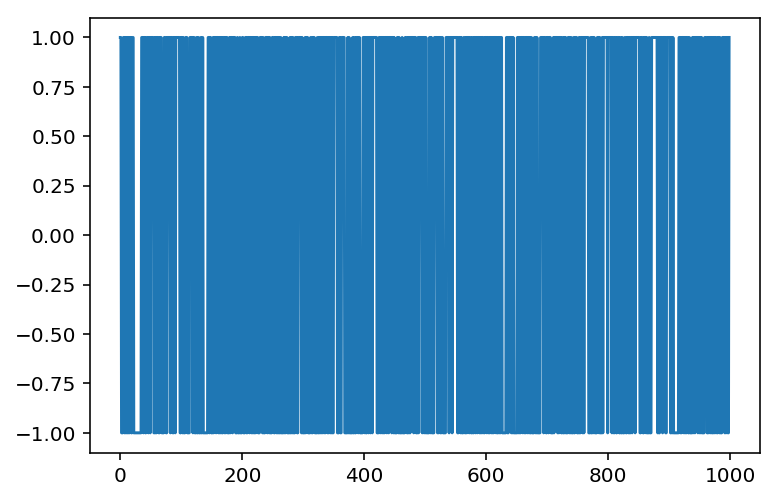

In [31]:
plt.plot(diff_rand_walk)

This difference graph also makes it clear that really we have no information to work with
here other than a series of random moves. There is no structure to learn. Now that the timeseries is stationary, we can recalculate the correlogram of the differenced series.

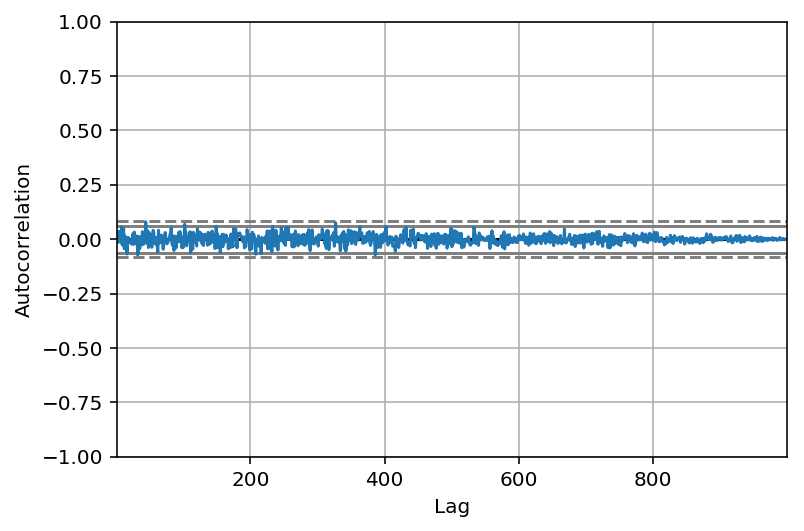

In [32]:
pd.plotting.autocorrelation_plot(diff_rand_walk)

Running the example, we can see no significant relationship between the lagged observations,
as we would expect from the way the random walk was generated. All correlations are small,
close to zero and below the 95% and 99% confidence levels (beyond a few statistical 
flukes).

**Predicting a Random Walk**

A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the
random walk is constructed, we can expect that the best prediction we could make would be to
use the observation at the previous time step as what will happen in the next time step. Simply
because we know that the next time step will be a function of the prior time step.

In [38]:
import math
from sklearn.metrics import mean_squared_error

In [39]:
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


Running the example estimates the RMSE of the model as 1. This too is expected, given
that we know that the variation from one time step to the next is always going to be 1, either
in the positive or negative direction.

*Is your timeseries a Random Walk*

Your time series may be a random walk. Some ways to check if your time series is a random
walk are as follows:
- The time series shows a strong temporal dependence that decays linearly or in a similar
pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable
structure in the data.
- The persistence model provides the best source of reliable predictions.

This last point is key for time series forecasting. Baseline forecasts with the persistence
model quickly flesh out whether you can do significantly better. If you can't, you're probably
working with a random walk. Many time series are random walks, particularly those of security
prices over time. The random walk hypothesis is a theory that stock market prices are a random
walk and cannot be predicted.

A random walk is one in which future steps or directions cannot be predicted on the
basis of past history. When the term is applied to the stock market, it means that
short-run changes in stock prices are unpredictable. ```--- Page 26, A Random Walk Down Wall Street```.


The human mind sees patterns everywhere and we must be vigilant that we are not fooling
ourselves and wasting time by developing elaborate models for random walk processes.

#### Decomposing Time Series Data

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality,
and noise components. Decomposition provides a useful abstract model for thinking about time
series generally and for better understanding problems during time series analysis and forecasting.